# A Comparative Analysis of Machine Learning Algorithms for Anemia Classification


## Introduction


The dataset consists of 1421 samples with six attributes: gender, hemoglobin, mean corpuscular hemoglobin (MCH), mean corpuscular hemoglobin concentration (MCHC), mean corpuscular volume (MCV), and result.

The result attribute(class), represented by the binary values 0 for non-anemic and 1 for anemic in the data set, was selected as the response variable. The gender attribute being binary, all other attributes were continuous variables, and the memory size consumed by the dataset was 66.7 MB.


* Objective: 
   - To build up the machine leanring model to classifiy anemic condition
   - To see if gender has an impact on hemoglobin levels  
   - Which algorithm would be best for detection

In [238]:
#Print system version
!jupyter --version
import sys
print("Python version:", sys.version)

Selected Jupyter core packages...
IPython          : 8.23.0
ipykernel        : 6.29.4
ipywidgets       : 8.1.2
jupyter_client   : 8.6.1
jupyter_core     : 5.7.2
jupyter_server   : 2.13.0
jupyterlab       : 4.1.5
nbclient         : 0.10.0
nbconvert        : 7.16.3
nbformat         : 5.10.4
notebook         : 7.1.2
qtconsole        : 5.4.2
traitlets        : 5.14.2
Python version: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


In [239]:
# importing necessary libraries

import pandas as pd # for data manipulation and analysis
import collections # for creating and manipulating Python's collections like OrderedDict, defaultdict, Counter, etc.
import numpy as np # for scientific computing with Python
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns # for advanced visualization

# Classifier Libraries 
from sklearn.linear_model import LogisticRegression # for implementing logistic regression algorithm
from sklearn.tree import DecisionTreeClassifier # for implementing decision tree algorithm
from sklearn.ensemble import RandomForestClassifier # for implementing random forest algorithm
from sklearn.svm import SVC # for implementing Support Vector Machine (SVM) algorithm
from sklearn.naive_bayes import GaussianNB # for implementing Naive Bayes algorithm
from sklearn.neighbors import KNeighborsClassifier # for implementing K-Nearest Neighbors (KNN)  algorithm


# For Statistical testing
from scipy.stats import ttest_ind # for computing t-test for two independent samples
import statsmodels.api as sm # for statistical models and tests
from scipy.stats import chi2_contingency # for computing chi-square statistic and p-value for a contingency table
import scipy.stats as stats # for implementing skewness and other stats


# Other Libraries
from sklearn.model_selection import train_test_split # for splitting data into training and testing sets
from sklearn.pipeline import make_pipeline # for building a pipeline of transforms with a final estimator
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline # for building a pipeline with imbalanced datasets
from imblearn.over_sampling import SMOTE # for oversampling imbalanced datasets using Synthetic Minority Over-sampling Technique (SMOTE)
from imblearn.under_sampling import NearMiss # for undersampling imbalanced datasets using NearMiss algorithm
from imblearn.metrics import classification_report_imbalanced # for generating a classification report for imbalanced datasets
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report # for computing various performance metrics for classification models
from collections import Counter # for counting the frequency of elements in a list
from sklearn.model_selection import KFold, StratifiedKFold # for k-fold cross-validation
from sklearn.model_selection import cross_val_score # for evaluating a model using cross-validation
from sklearn.metrics import cohen_kappa_score # for computing Cohen's kappa score for inter-rater agreement

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 5000) # for setting the maximum number of columns to display in pandas dataframes


In [240]:

#   first read the data file
df= pd.read_csv('anemia data from Kaggle.csv')

# Exploratory Data Analysis

We need to explore/clean/filter it before processing it for machine learning It involves adding/deleting few columns or rows, joining some other data, and handling qualitative variables like dates.


In [241]:
df.shape

(1421, 6)

In [242]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


Lets summarize the central tendency, dispersion and shape of dataset distribution

In [243]:
# Print summary statistics
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


In [244]:
#listing the data shape
df.shape

(1421, 6)

In [245]:
# the complete information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [246]:
#columns name
df.columns

Index(['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV', 'Result'], dtype='object')

In [247]:
#Checking Null 
# Import numpy
import numpy as np

# Inspect missing values in the dataset
print(df.isnull().values.sum())

# Replace the ' 's with NaN
df = df.replace(" ",np.NaN)

# Count the number of NaNs in the dataset to verify
print(df.isnull().values.sum())



0
0



* Dataset contains 1421 records with 5 features
* Memory usages if 66.7KB whish is easy to process on local machine
* The data seems to  be clean with zero missing values
* 2 columns are int64 and rest are float 64


Now we will be creating the copy of data so that we avoid the mistake of modifying the data

The thus created data will mapped with naming convention so that we can easily visualize it:
* 0: 'Non Anemic'
* 1: 'Anemic'
    
similary, 
* 0: 'Male'
* 1: 'Female'
    
    

In [248]:
# Create a copy of the DataFrame to avoid modifying the original data
df_copy = df.copy()

# Rename values in the 'Result' column just for the plot
df_copy['Result'] = df_copy['Result'].replace({0: 'Non Anemic', 1: 'Anemic'})
# Rename values in the 'Gender' column
df_copy['Gender'] = df_copy['Gender'].replace({0: 'Male', 1: 'Female'})


# Define custom hex colors
custom_colors = ['#B43757', '#a37b85']
custom_colors_gender = ['#90ADC6', '#C6A990']


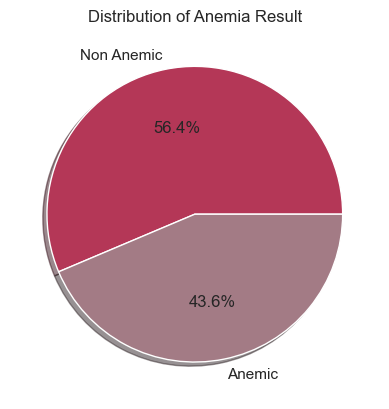

In [249]:
# Create a pie chart of the distribution of anemia result
result_counts = df_copy['Result'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=custom_colors, shadow=True)
plt.title('Distribution of Anemia Result')
plt.show()

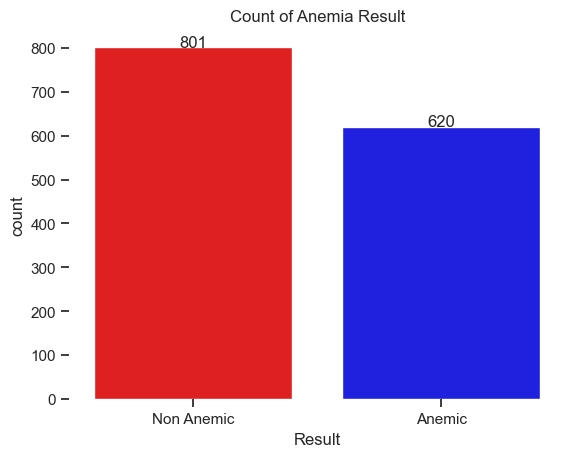

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if custom_colors is defined
custom_colors = ["red", "blue"]  # Example custom colors

# Check if 'Result' column is in df_copy
if 'Result' in df_copy.columns:
    # Create a count plot of the anemia result
    ax = sns.countplot(x='Result', data=df_copy, palette=custom_colors)
    plt.title('Count of Anemia Result')

    # Add labels to the bars
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:.0f}'.format(p.get_height()), ha='center')  # Use '{:.0f}' to format as float without decimal places

    # Remove spines
    sns.despine(left=True, bottom=True)

    plt.show()
else:
    print("The 'Result' column is not found in the DataFrame.")


In [251]:
# Count the number of occurrences of each unique value in the 'Result' column
result_counts = df_copy['Result'].value_counts()

# Print the counts of the two categories
print(result_counts)

# Check if the two categories are balanced or not
if result_counts[0] == result_counts[1]:
    print('The two categories are balanced.')
else:
    print('The two categories are not balanced.')
    
print("-----")    
# The classes are heavily skewed we need to solve this issue later.
print('Non Anemic', round(df['Result'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Anemic', round(df['Result'].value_counts()[1]/len(df) * 100,2), '% of the dataset')   
    

Result
Non Anemic    801
Anemic        620
Name: count, dtype: int64
The two categories are not balanced.
-----
Non Anemic 56.37 % of the dataset
Anemic 43.63 % of the dataset


Here we see the categories are not balanced and we need to address the class imbalance in our data before building a predictive model. 

Imbalanced classes can cause issues in machine learning models, as the model may be biased towards the majority class and may not perform well on the minority class.

Most of the class are non-Anemic. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most class are non anemic.


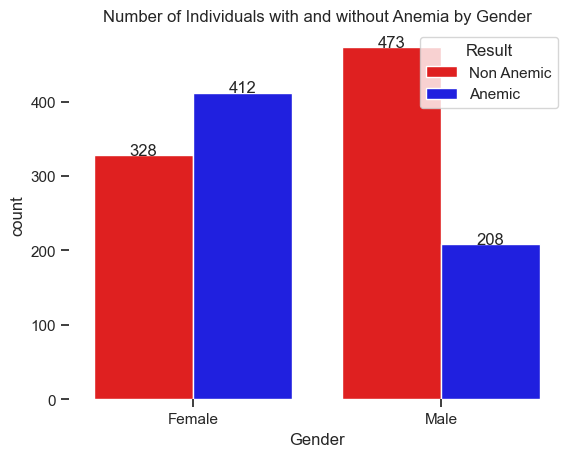

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if custom_colors is defined
custom_colors = ["red", "blue"]  # Example custom colors

# Check if 'Gender' and 'Result' columns are in df_copy
if 'Gender' in df_copy.columns and 'Result' in df_copy.columns:
    # Create a count plot of the anemia result by gender
    ax = sns.countplot(x='Gender', hue='Result', data=df_copy, palette=custom_colors)
    plt.title('Number of Individuals with and without Anemia by Gender')

    # Add labels to the bars
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:.0f}'.format(p.get_height()), ha='center')  # Use '{:.0f}' to format as float without decimal places

    # Remove spines
    sns.despine(left=True, bottom=True)

    plt.show()
else:
    print("The 'Gender' or 'Result' column is not found in the DataFrame.")


There are 412 Female and 208 Male with Anemic

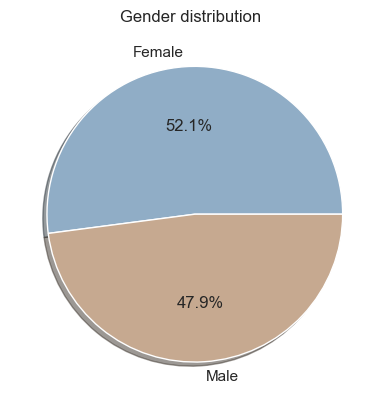

In [253]:
result_counts = df_copy['Gender'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=custom_colors_gender, shadow=True)
plt.title('Gender distribution  ')
plt.show()

* Female participants constist of 4.2% more compared to male


In [254]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [255]:
df_copy.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,Female,14.9,22.7,29.1,83.7,Non Anemic
1,Male,15.9,25.4,28.3,72.0,Non Anemic
2,Male,9.0,21.5,29.6,71.2,Anemic
3,Male,14.9,16.0,31.4,87.5,Non Anemic
4,Female,14.7,22.0,28.2,99.5,Non Anemic


In [256]:
# anemia_rates = df.groupby('Gender')['Result'].mean().reset_index()

# ax = sns.barplot(x='Gender', y='Result', data=anemia_rates, palette=custom_colors_gender)
# ax.set_xticklabels(['Male', 'Female'])
# plt.title('Mean Anemia Rate by Gender')
# plt.xlabel('Gender')
# plt.ylabel('Mean Anemia Rate')
# plt.show()

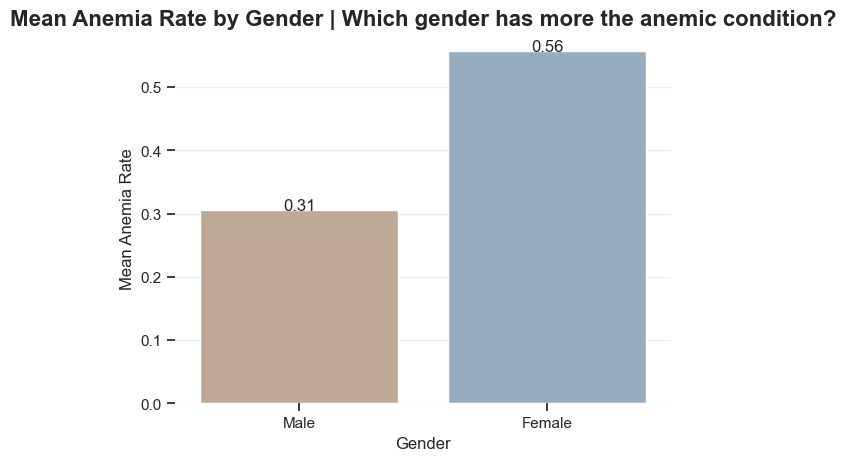

<Figure size 800x600 with 0 Axes>

In [257]:

color_gen = {1: '#90ADC6', 0: '#C6A990'}


anemia_rates = df.groupby('Gender')['Result'].mean().reset_index()


# Create the bar plot
ax = sns.barplot(x='Gender', y='Result', data=anemia_rates, palette=color_gen)

# Add labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:.2f}'.format(p.get_height()), ha='center')
    ax.set_xticklabels(['Male', 'Female'])
    
# Add plot titles and labels
plt.title('Mean Anemia Rate by Gender | Which gender has more the anemic condition?', fontsize=16, fontweight='bold')
plt.xlabel('Gender' , fontsize=12)
plt.ylabel('Mean Anemia Rate' , fontsize=12)

# Remove spines
sns.despine(left=True, bottom=True)

# Remove vertical lines from the grid
plt.grid(axis='y', alpha=0.3)
plt.gca().xaxis.grid(False)

plt.figure(figsize=(8, 6))
# Show the plot
plt.show()



In [258]:
anemia_rates = df.groupby('Gender')['Result'].mean().round(2)
anemia_rates

Gender
0    0.31
1    0.56
Name: Result, dtype: float64

 0 shows that the mean anemia rate for males is 0.31. This means that, on average, 31% of males in the dataset have anemia.

1 shows that the mean anemia rate for females is 0.56. This means that, on average, 56% of females in the dataset have anemia.

Therefore, the data suggests that females are more likely to have anemia than males in this dataset.

We should also be clear that, female population is 4.2% more than the male. 


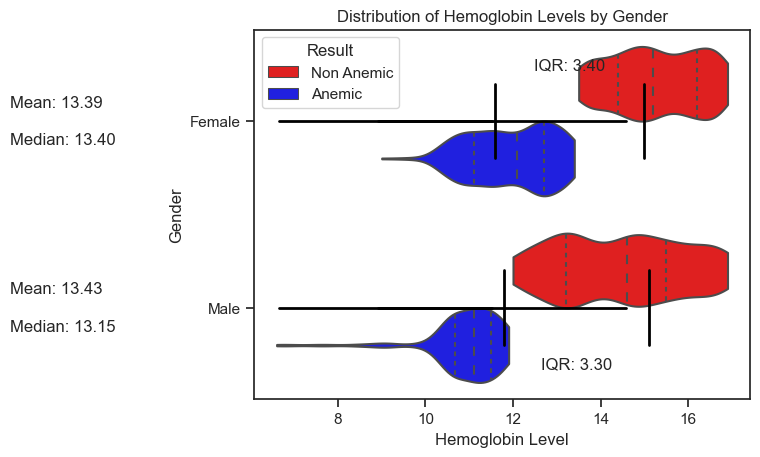

In [259]:
# Create separate subsets for males and females
male_data = df_copy[df_copy['Gender'] == 'Male']
female_data = df_copy[df_copy['Gender'] == 'Female']

# Plot horizontal violinplot using Seaborn
sns.violinplot(x='Hemoglobin', y='Gender', hue='Result', data=df_copy, palette=custom_colors, inner='quartile', scale='width', cut=0)

# Add mean and median lines
for i, group in enumerate([male_data, female_data]):
    median = group['Hemoglobin'].median()
    mean = group['Hemoglobin'].mean()
    plt.axhline(y=i, xmin=0.05, xmax=0.48, color='black', linewidth=2)
    plt.text(0.51, i+0.1, f'Median: {median:.2f}', ha='left', va='center')
    plt.text(0.51, i-0.1, f'Mean: {mean:.2f}', ha='left', va='center')

# Add IQR whiskers
q1_male, q3_male = male_data['Hemoglobin'].quantile([0.25, 0.75])
q1_female, q3_female = female_data['Hemoglobin'].quantile([0.25, 0.75])
plt.axhline(y=0, xmin=0.25, xmax=0.75, color='black', linewidth=2)
plt.axhline(y=1, xmin=0.25, xmax=0.75, color='black', linewidth=2)
plt.plot([q1_male, q1_male], [-0.2, 0.2], color='black', linewidth=2)
plt.plot([q3_male, q3_male], [-0.2, 0.2], color='black', linewidth=2)
plt.plot([q1_female, q1_female], [0.8, 1.2], color='black', linewidth=2)
plt.plot([q3_female, q3_female], [0.8, 1.2], color='black', linewidth=2)
plt.text((q1_male+q3_male)/2, -0.3, f'IQR: {q3_male-q1_male:.2f}', ha='center', va='center')
plt.text((q1_female+q3_female)/2, 1.3, f'IQR: {q3_female-q1_female:.2f}', ha='center', va='center')



# Add title and labels
plt.title('Distribution of Hemoglobin Levels by Gender')
plt.xlabel('Hemoglobin Level')
plt.ylabel('Gender')


# Show the plot
plt.show()


Shows density of your data in addition to the center, spread, and any outliers that may be present. 

Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability.

The median Hemoglobin level for female with anemic is around 12 and for male is 11.

We see the Mean is higher than median for Male becuase distrubution is moving  left tail. 

We see the genderwise distribution fot Anemic and Non Anemic is not same. 






### Distribution of Hemoglobin

Hemoglobin is the protein in your red blood cells that transports oxygen to the tissues of your body

The normal hemoglobin range is generally defined as 
 13.2 to 16.6 grams (g) of hemoglobin per deciliter (dL) of blood for men and 
 11.6 to 15 g/dL for women.
 
**Freedman-Diaconis rule**  

The rule takes into account the spread of the data and the sample size, and is intended to give a reasonable balance between the level of detail in the histogram and the ability to discern patterns in the data for creating bin size.

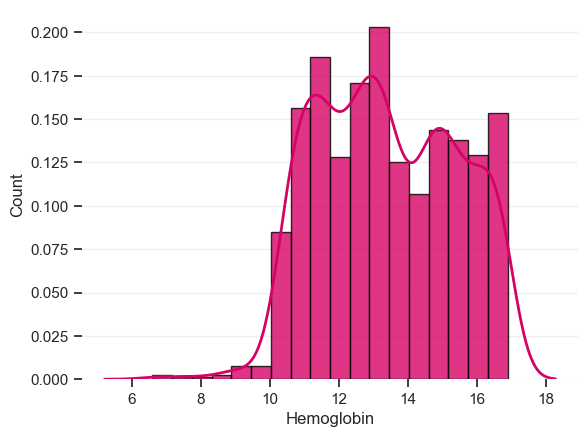

<Figure size 800x600 with 0 Axes>

In [260]:
iqr = np.percentile(df['Hemoglobin'], 75) - np.percentile(df['Hemoglobin'], 25)

# Bin width using the Freedman-Diaconis rule 
bin_width = 2 * iqr / (len(df)**(1/3))
                       
                       


sns.distplot(df['Hemoglobin'], hist=True, kde=True, 
             bins=int(round((df['Hemoglobin'].max() - df['Hemoglobin'].min()) / bin_width)),
             color='#d60266',
             hist_kws={'edgecolor':'black', 'alpha': 0.8},
             kde_kws={'linewidth': 2})

# Add labels and adjust font sizes
#plt.title('Distribution of Hemoglobin Levels', fontsize=16, fontweight='bold')
plt.xlabel('Hemoglobin', fontsize=12)
plt.ylabel('Count', fontsize=12)

# # Add legend
# plt.legend(labels=['Hemoglobin'], loc='upper right')

# Remove spines
sns.despine(left=True, bottom=True)

# Remove vertical lines from the grid
plt.grid(axis='y', alpha=0.3)
plt.gca().xaxis.grid(False)


# Adjust plot size
plt.figure(figsize=(8, 6))
# Show plot
plt.show()




We see the value of Hemoglobin is maximum at 13 and the hemoglobin is left skewed as longer on the left side of its peak. 

Left skew: mean < median

In [261]:
# Calculate skewness using the skew() function
skewness = stats.skew(df['Hemoglobin'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df['Hemoglobin'], fisher=False)

# Print the result
print("Skewness:", skewness)
# Print the result
print("Kurtosis:", kurtosis)

Skewness: 0.022721507912660675
Kurtosis: 2.1042580924983616


Presence of slightly negative skewness

In [262]:
# Create a dictionary with the values
hemoglobin_data = {'Metric': ['Highest Hemoglobin Level', 'Average Hemoglobin Level', 'Lowest Hemoglobin Level'],
                   'Value': [df['Hemoglobin'].max(), df['Hemoglobin'].mean(), df['Hemoglobin'].min()]}

# Create a pandas DataFrame from the dictionary
hemoglobin_table = pd.DataFrame(hemoglobin_data)

# Create the table using Seaborn styling
styled_table = (hemoglobin_table.style
                .set_caption('Hemoglobin Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
# Display the table
display(styled_table)


,Metric,Value
0,Highest Hemoglobin Level,16.90
1,Average Hemoglobin Level,13.41
2,Lowest Hemoglobin Level,6.60


 Lower than normal hemoglobin levels indicate anemia. 
 The normal hemoglobin range is generally defined as 
 13.2 to 16.6 grams (g) of hemoglobin per deciliter (dL) of blood for men and 
 11.6 to 15 g/dL for women.
 
 
* men < 13.2 g/dL is low,
* women, a< 11.6 g/dL is  low. 

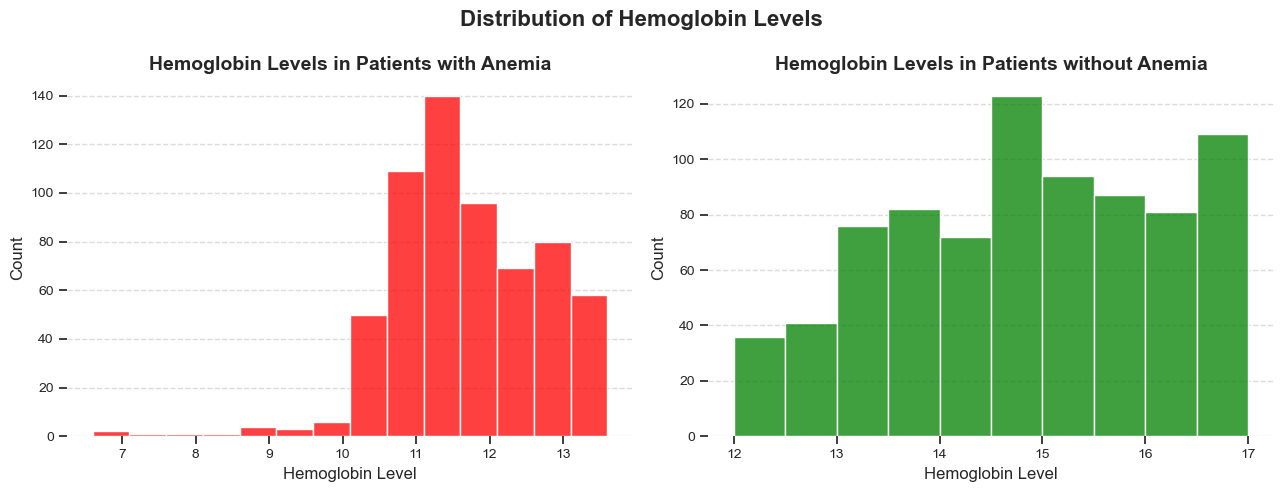

In [263]:
# Filter the data by anemia status
anemia_data = df[df['Result'] == 1]
no_anemia_data = df[df['Result'] == 0]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

# Plot histograms with Seaborn
sns.histplot(anemia_data, x='Hemoglobin', ax=ax1, color='red',  binwidth=0.5)
sns.histplot(no_anemia_data, x='Hemoglobin', ax=ax2, color='green',  binwidth=0.5)

# Set titles and axis labels
ax1.set_title('Hemoglobin Levels in Patients with Anemia', fontsize=14, fontweight='bold')
ax2.set_title('Hemoglobin Levels in Patients without Anemia', fontsize=14, fontweight='bold')
fig.suptitle('Distribution of Hemoglobin Levels', fontsize=16, fontweight='bold')
ax1.set_xlabel('Hemoglobin Level', fontsize=12)
ax2.set_xlabel('Hemoglobin Level', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)

# Customize tick labels and grid
ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Remove spines
sns.despine(left=True, bottom=True)

# # Add legend
# ax1.legend(labels=['Patients with Anemia'], loc='upper right', fontsize=10)
# ax2.legend(labels=['Patients without Anemia'], loc='upper right', fontsize=10)

# Adjust plot size
plt.tight_layout()

# Show the plot
plt.show()


We see that Haemoglobin level of pateinces with Anemia is showing left skewed. The people with Hgb level in the range 11-12 are more and without anemia is 14-15

### MCH

MCH stands for “mean corpuscular hemoglobin.” 
An MCH value refers to the average quantity of hemoglobin present in a single red blood cell. 

It is usually reported as part of a complete blood count (CBC). An MCH level that is too high or too low can be a sign of an underlying health condition.


>normal range of Mean Corpuscular Hemoglobin (MCH) is typically between 27 and 33 picograms (pg) per red blood cell

In [264]:
# Create a dictionary with the values mean corpuscular hemoglobin MCH
MCH_data = {'Metric': ['Highest MCH Level', 'Average MCH Level', 'Lowest MCH Level'],
                   'Value': [df['MCH'].max(), df['MCH'].mean(), df['MCH'].min()]}

# Create a pandas DataFrame from the dictionary
MCH_table = pd.DataFrame(MCH_data)

# Create the table using Seaborn styling
styled_table = (MCH_table.style
                .set_caption('MCH Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
# Display the table
display(styled_table)

,Metric,Value
0,Highest MCH Level,30.00
1,Average MCH Level,22.91
2,Lowest MCH Level,16.00


The highest MCH level in this table is 30.00, which indicates that some red blood cells have a higher than normal amount of hemoglobin. This could be due to various reasons such as vitamin deficiencies, liver disease, or alcoholism.

The average MCH level in this table is 22.91, which is within the normal range ( 27 - 33 Pg per red blood cell)

The lowest MCH level in this table is 16.00, which indicates that some red blood cells have a lower than normal amount of hemoglobin. This could be due to conditions such as iron-deficiency anemia, thalassemia (low MCH can also be caused by other factors such as thalassemia, a genetic disorder that affects the production of hemoglobin.), or chronic kidney disease

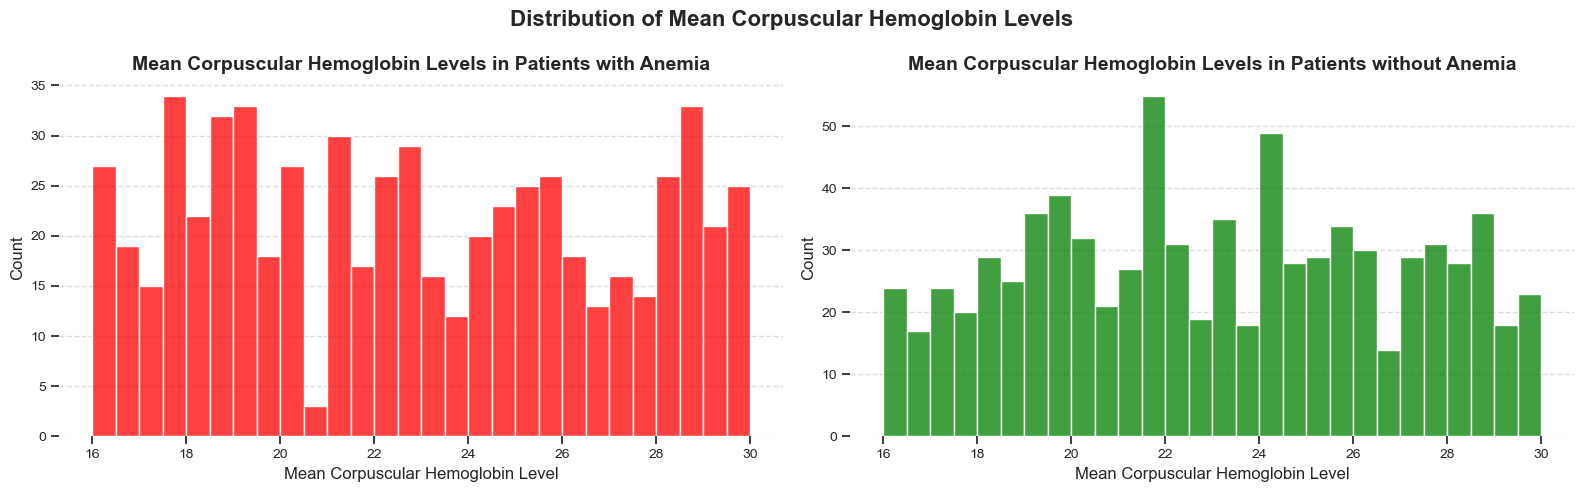

In [265]:
# Filter the data by anemia status
anemia_data = df[df['Result'] == 1]
no_anemia_data = df[df['Result'] == 0]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

# Plot histograms with Seaborn
sns.histplot(anemia_data, x='MCH', ax=ax1, color='red',  binwidth=0.5)
sns.histplot(no_anemia_data, x='MCH', ax=ax2, color='green',  binwidth=0.5)

# Set titles and axis labels
ax1.set_title('Mean Corpuscular Hemoglobin Levels in Patients with Anemia', fontsize=14, fontweight='bold')
ax2.set_title('Mean Corpuscular Hemoglobin Levels in Patients without Anemia', fontsize=14, fontweight='bold')
fig.suptitle('Distribution of Mean Corpuscular Hemoglobin Levels', fontsize=16, fontweight='bold')
ax1.set_xlabel('Mean Corpuscular Hemoglobin Level', fontsize=12)
ax2.set_xlabel('Mean Corpuscular Hemoglobin Level', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)

# Customize tick labels and grid
ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Remove spines
sns.despine(left=True, bottom=True)

# # Add legend
# ax1.legend(labels=['Patients with Anemia'], loc='upper right', fontsize=10)
# ax2.legend(labels=['Patients without Anemia'], loc='upper right', fontsize=10)

# Adjust plot size
plt.tight_layout()

# Show the plot
plt.show()

### MCHC (Mean Corpuscular Hemoglobin Concentration)

It represents the average weight of hemoglobin in a given volume of packed red blood cells. MCHC is expressed in grams per deciliter (g/dL).


normal range of MCHC is typically between 32 and 36 g/dL

A low MCHC value indicates hypochromic red blood cells, which means that the cells have less hemoglobin than normal, while a high MCHC value indicates hyperchromic red blood cells, which means that the cells have more hemoglobin than normal. MCHC is used along with other blood tests to diagnose anemia and to monitor response to treatment.

In [266]:
# Create a dictionary with the values mean corpuscular hemoglobin MCH
MCHC_data = {'Metric': ['Highest MCHC Level', 'Average MCHC Level', 'Lowest MCHC Level'],
                   'Value': [df['MCHC'].max(), df['MCHC'].mean(), df['MCHC'].min()]}

# Create a pandas DataFrame from the dictionary
MCHC_table = pd.DataFrame(MCHC_data)

# Create the table using Seaborn styling
styled_table = (MCHC_table.style
                .set_caption('MCHC Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
# Display the table
display(styled_table)

,Metric,Value
0,Highest MCHC Level,32.50
1,Average MCHC Level,30.25
2,Lowest MCHC Level,27.80


In the given values, the highest MCHC level is 32.5,
the average MCHC level is 30.25, and the lowest MCHC level is 27.8.


The highest MCHC level is 32.5%, which means that the concentration of hemoglobin in the red blood cells is relatively high. The average MCHC level is 30.25%, which is a typical value for MCHC in healthy individuals. The lowest MCHC level is 27.8%, which means that the concentration of hemoglobin in the red blood cells is relatively low. However, it is important to note that the interpretation of MCHC levels should be done in the context of other factors such as MCV (mean corpuscular volume), RDW (red cell distribution width), and hemoglobin levels to determine if there is an underlying health condition such as anemia or a nutritional deficiency.



MCHC is expressed as a percentage (%) representing the concentration of hemoglobin in a given volume of packed red blood cells. 

It is calculated by dividing the amount of hemoglobin by the volume of packed red blood cells. 

The use of percentages makes it easier to compare MCHC values across different populations and to interpret the results.




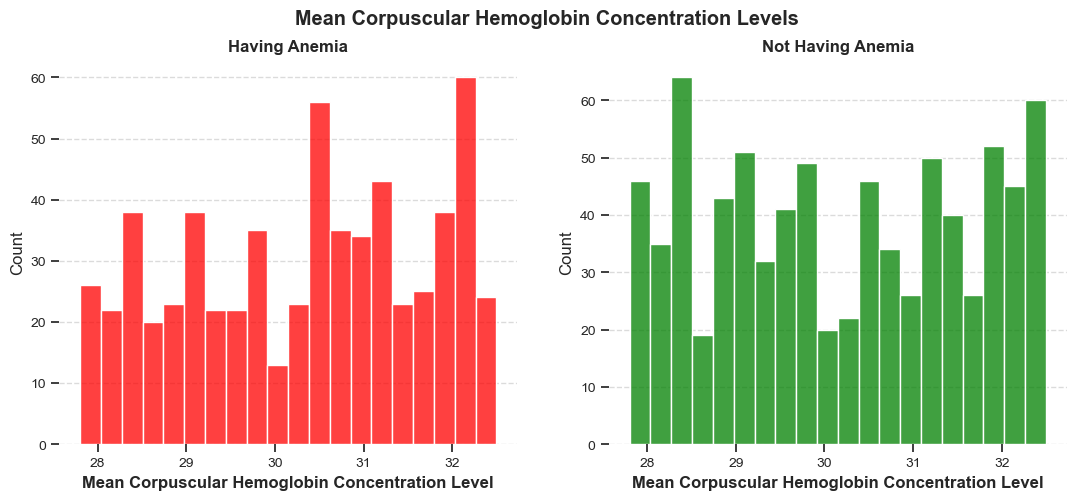

In [267]:
# Filter data for anemia and non-anemia cases
anemia_data = df[df['Result']==1]
no_anemia_data = df[df['Result']==0]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

# Plot histograms with Seaborn
sns.histplot(anemia_data, x='MCHC', ax=ax1, color='red', bins=20)
sns.histplot(no_anemia_data, x='MCHC', ax=ax2, color='green', bins=20)


# Customize tick labels and grid
ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)



# Set titles and axis labels
ax1.set_title('Having Anemia', fontweight='bold')
ax2.set_title('Not Having Anemia', fontweight='bold')
fig.suptitle('Mean Corpuscular Hemoglobin Concentration Levels', fontweight='bold')
ax1.set_xlabel('Mean Corpuscular Hemoglobin Concentration Level', fontweight='bold')
ax2.set_xlabel('Mean Corpuscular Hemoglobin Concentration Level', fontweight='bold')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')

# Remove spines
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()


### MCV (Mean Corpuscular Volume)

is a measure of the average volume of a red blood cell. It is calculated by dividing the total volume of red blood cells by the total number of red blood cells in a sample of blood. MCV is reported in femtoliters (fL).

The normal range for MCV is typically between 80 to 100 femtoliters (fL).

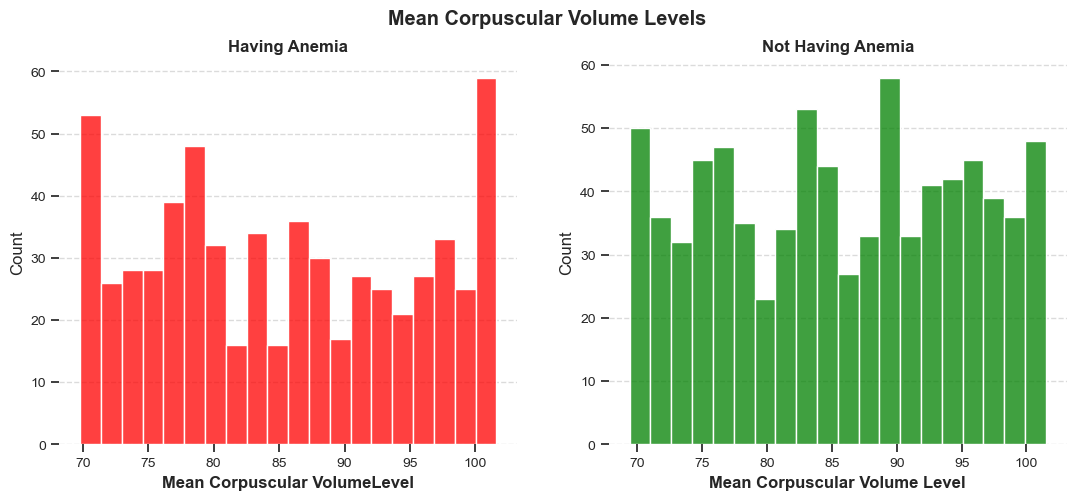

In [268]:
# Filter data for anemia and non-anemia cases
anemia_data = df[df['Result']==1]
no_anemia_data = df[df['Result']==0]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

# Plot histograms with Seaborn
sns.histplot(anemia_data, x='MCV', ax=ax1, color='red', bins=20)
sns.histplot(no_anemia_data, x='MCV', ax=ax2, color='green', bins=20)


# Customize tick labels and grid
ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)



# Set titles and axis labels
ax1.set_title('Having Anemia', fontweight='bold')
ax2.set_title('Not Having Anemia',fontweight='bold' )
fig.suptitle('Mean Corpuscular Volume Levels',fontweight='bold')
ax1.set_xlabel('Mean Corpuscular VolumeLevel',fontweight='bold')
ax2.set_xlabel('Mean Corpuscular Volume Level',fontweight='bold')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')

# Remove spines
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

In [269]:
# Create a dictionary with the values mean corpuscular hemoglobin MCH
MCV_data = {'Metric': ['Highest MCV Level', 'Average MCV Level', 'Lowest MCV Level'],
                   'Value': [df['MCV'].max(), df['MCV'].mean(), df['MCV'].min()]}

# Create a pandas DataFrame from the dictionary
MCV_table = pd.DataFrame(MCV_data)

# Create the table using Seaborn styling
styled_table = (MCV_table.style
                .set_caption('MCV Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
# Display the table
display(styled_table)

,Metric,Value
0,Highest MCV Level,101.60
1,Average MCV Level,85.52
2,Lowest MCV Level,69.40


Highest MCV level is slightly above the normal range, while the lowest MCV level is below the normal range. The average MCV level is within the normal range.

Important to note that the interpretation of MCV levels should always be done in the context of the individual's overall health and medical history, and a healthcare professional should be consulted for any concerns or abnormalities.

###  Hemoglobin, MCH, MCHC, MCV highest, lowest and average value


In [270]:
# dictionary with the values for MCHC, MCV, MCH, and hemoglobin
blood_data = {'Metric': ['Highest MCHC Level', 'Average MCHC Level', 'Lowest MCHC Level',
                         'Highest MCV Level', 'Average MCV Level', 'Lowest MCV Level',
                         'Highest MCH Level', 'Average MCH Level', 'Lowest MCH Level',
                         'Highest Hemoglobin Level', 'Average Hemoglobin Level', 'Lowest Hemoglobin Level'],
              'Value': [df['MCHC'].max(), df['MCHC'].mean(), df['MCHC'].min(),
                        df['MCV'].max(), df['MCV'].mean(), df['MCV'].min(),
                        df['MCH'].max(), df['MCH'].mean(), df['MCH'].min(),
                        df['Hemoglobin'].max(), df['Hemoglobin'].mean(), df['Hemoglobin'].min()]}

# Create a pandas df
blood_table = pd.DataFrame(blood_data)

# Create the table 
styled_table = (blood_table.style
                .set_caption('Blood Test Results')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',                                    'props': [('font-size', '18px'),                                              ('font-weight', 'bold'),                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
# Display the table
display(styled_table)


,Metric,Value
0,Highest MCHC Level,32.50
1,Average MCHC Level,30.25
2,Lowest MCHC Level,27.80
3,Highest MCV Level,101.60
4,Average MCV Level,85.52
5,Lowest MCV Level,69.40
6,Highest MCH Level,30.00
7,Average MCH Level,22.91
8,Lowest MCH Level,16.00
9,Highest Hemoglobin Level,16.90


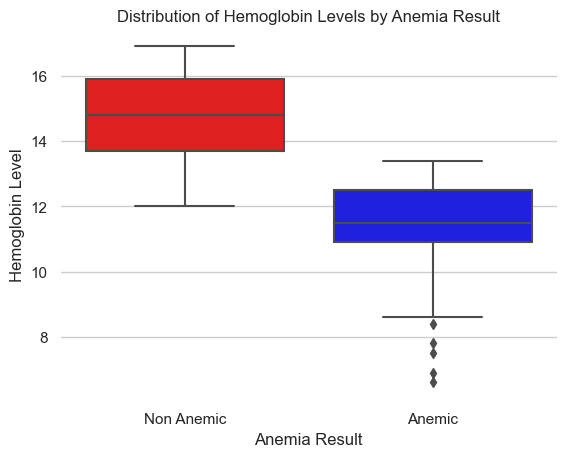

In [271]:
sns.set_style("whitegrid")
sns.boxplot(x='Result', y='Hemoglobin', data=df_copy, palette=custom_colors)
plt.title('Distribution of Hemoglobin Levels by Anemia Result')
plt.xlabel('Anemia Result')
plt.ylabel('Hemoglobin Level')



# Remove spines
sns.despine(left=True, bottom=True)
plt.show()


* The longer the box, the more dispersed the data - Non anemic have more disperesed data.
* Median line of a box plot lies outside of the box of a each other, there is likely to be a difference between the two groups.
* For anemic we see data point that is located outside the whiskers of the box plot thus presence of outlier.


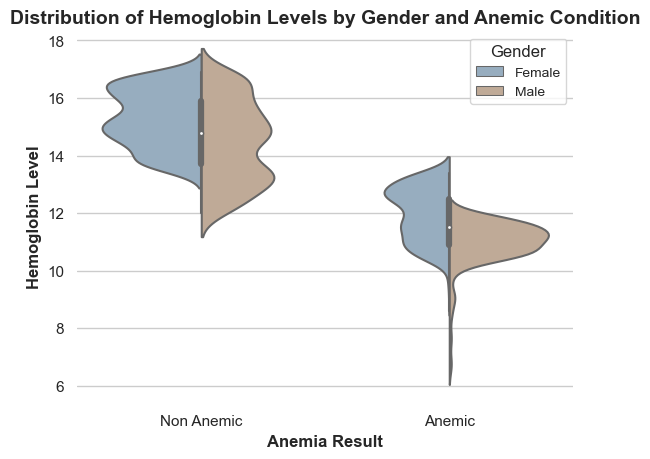

In [272]:
# Set plot style


# Create violin plot using Seaborn
ax = sns.violinplot(x='Result', y='Hemoglobin', hue='Gender', data=df_copy, palette=custom_colors_gender, split=True)

# Set plot title and axis labels
ax.set_title('Distribution of Hemoglobin Levels by Gender and Anemic Condition', fontsize=14, fontweight='bold')
ax.set_xlabel('Anemia Result', fontsize=12, fontweight='bold')
ax.set_ylabel('Hemoglobin Level', fontsize=12, fontweight='bold')

# Add legend and adjust its position
ax.legend(title='Gender', title_fontsize=12, fontsize=10, loc='upper right')

# Remove spines
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()


Here,
* The white dot inside each violin represents the median value of the data.
(We see medin of non anemic is higher than anemic)

* The thick black line inside each violin represents the interquartile range (IQR) of the data, which contains the middle 50% of the data. (Non anemic have thicker lines)

* The thin black lines, or "whiskers," that extend from the violins represent the range of the data, excluding any outliers.( more extended for anemic)

* The width of the violin at each value represents the probability density of the data at that value. Wider sections of the violin indicate that more data points are clustered around that value.

* We see male in Anemic have symmetric and bell-shaped which indicates that the data is normally distributed.For rest we see as multiple peaks, this indicates that the data is non-normal.

* we see bimodal distribution for. 



In [273]:
df[['Gender','Hemoglobin','Result', 'MCH', 'MCV', 'MCHC']].corr()['Result'].sort_values(ascending=False).head(10)

Result        1.000000
Gender        0.253169
MCHC          0.048067
MCV          -0.020571
MCH          -0.028678
Hemoglobin   -0.796261
Name: Result, dtype: float64

----------

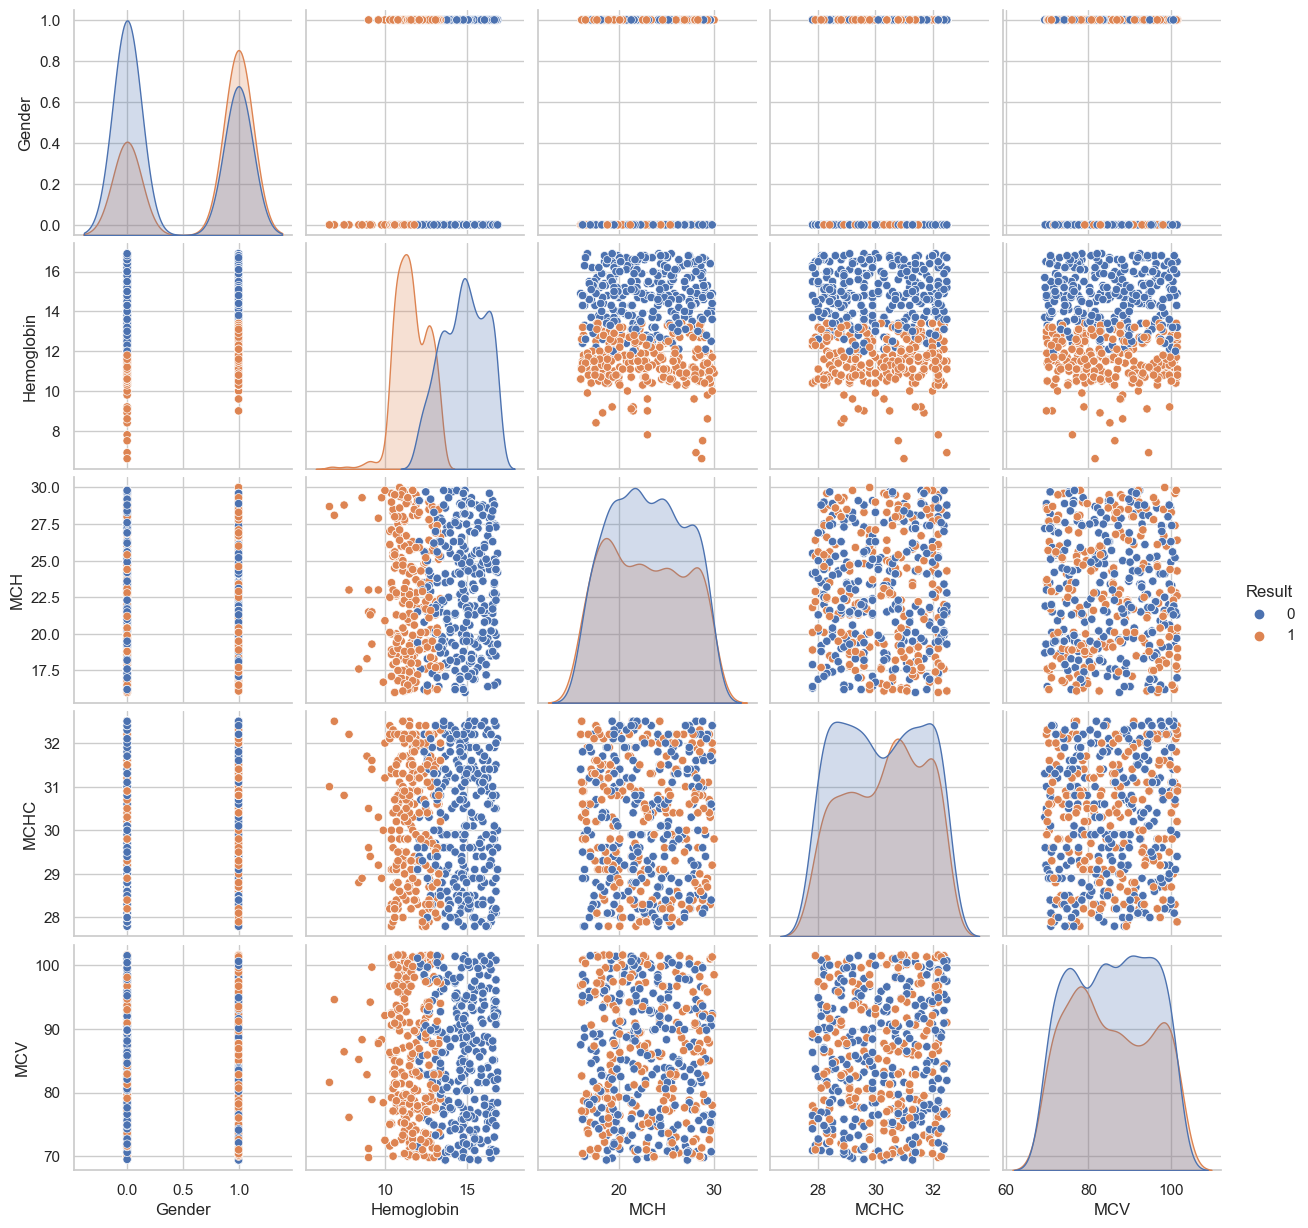

In [274]:
sns.pairplot(df,hue='Result')

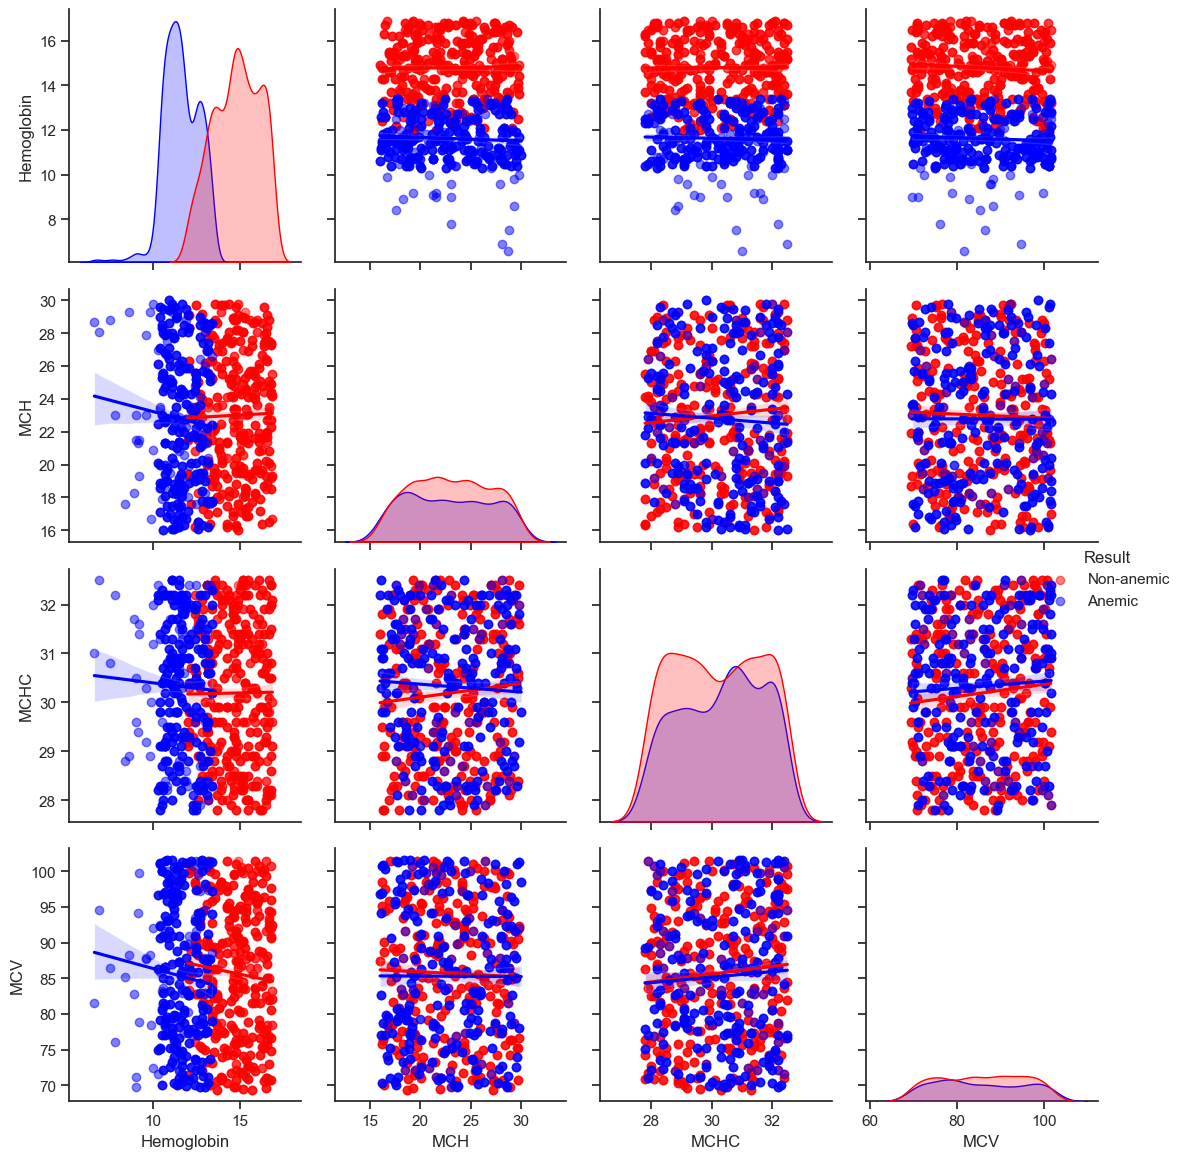

In [275]:
sns.set(style="ticks")

RELATIONS_COLS = ["Hemoglobin", "MCH", "MCHC","MCV"]

g = sns.PairGrid(data=df, vars=RELATIONS_COLS, hue="Result", palette=custom_colors)
g.map_diag(sns.kdeplot, shade=True)
g.map_offdiag(sns.regplot, scatter_kws={'alpha':0.5})
g.add_legend(title="Result")
legend = g._legend

# set figure size
g.fig.set_size_inches(12, 12)

# update legend labels
new_labels = ['Non-anemic', 'Anemic']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)


# legend.texts[0].set_text('Non Anemic')
# legend.texts[1].set_text('Anemic')
# g.fig.suptitle("Relations in the Dataset", y=1.03)

Pairplots shows tha relationship and we see Hemoglobin is kind of constant slope with other variable for both anemic and non anemic data.


---

# Statistical test

## t-test 

A t-test is a statistical test used to determine whether there is a significant difference between the means of two groups. In our case, we are using a t-test to determine whether there is a significant difference in the mean hemoglobin levels between males and females.

As we see Hemoglobin have negaive skewness but t-test asumes have normal distribution. So before performing t-test, we  would be taking the logarithm of the data, which can help to reduce the skewness. 


In [276]:
df_stat = df.copy()
df_stat.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [277]:

# Separate the hemoglobin data by gender
male_hemoglobin = df_stat.loc[df_stat['Gender'] == 0, 'Hemoglobin']
female_hemoglobin = df_stat.loc[df_stat['Gender'] == 1, 'Hemoglobin']

# Compute the t-test statistic and p-value
t_statistic, p_value = ttest_ind(male_hemoglobin, female_hemoglobin)

# Print the results
print("T-Statistic: {:.2f}".format(t_statistic))
print("P-Value: {:.3f}".format(p_value))

# Compare the p-value with the significance level (0.05)
if p_value < 0.05:
    print("Reject null hypothesis: Gender has an impact on hemoglobin levels.")
else:
    print("Fail to reject null hypothesis: Gender has no impact on hemoglobin levels.")


T-Statistic: -0.41
P-Value: 0.679
Fail to reject null hypothesis: Gender has no impact on hemoglobin levels.


t-statistic is negative, it suggests that the mean hemoglobin level for males is slightly lower than the mean hemoglobin level for females, but the difference is not large.

P value is greater than the significance level of 0.05 so fail to reject null hypothesis.

Thus, we can conclude that there is not enough evidence to support the claim that gender has an impact on hemoglobin levels.

## Odd Ratio

Odds ratio is a measure of the strength of association between two variables. We are looking for gender and Anemic condition(Result). The odds ratio tells us the odds of having anemia for females relative to males. 

An odds ratio greater than 1 indicates that the odds of having anemia are higher for females, while an odds ratio less than 1 indicates that the odds of having anemia are higher for males.
 


In [278]:

# Create binary variables for gender and anemia status
df_stat['is_female'] = np.where(df_stat['Gender'] == 1, 1, 0)
df_stat['is_anemic'] = np.where(df_stat['Result'] == 1, 1, 0)

# Fit a logistic regression model with gender and anemia status as predictors
logit_model = sm.Logit(df_stat['is_anemic'], sm.add_constant(df_stat['is_female']))
result = logit_model.fit()

# Print the odds ratio for gender
print("Odds Ratio for Gender: {:.2f}".format(np.exp(result.params[1])))

Optimization terminated successfully.
         Current function value: 0.652524
         Iterations 5
Odds Ratio for Gender: 2.86


Logistic regression model converged successfully with 5 iterations, and the odds ratio for gender is 2.86.

An odds ratio of 2.86 means that females have 2.86 times the odds of being anemic compared to males. This indicates that being female is associated with a higher risk of anemia compared to being male, assuming that other factors in the model are held constant.

# Chi-square test

Dhi-square test is a statistical test used to determine whether there is a significant association between two categorical variables. In this case, we are using the chi-square test to determine whether there is a significant association between gender and anemia status.




In [279]:

# Create a contingency table of gender and anemia status
cont_table = pd.crosstab(df_stat['Gender'], df_stat['Result'])

# Perform the chi-square test of independence
chi2_statistic, p_value, dof, expected = chi2_contingency(cont_table)

# Print the results
print("Chi-Square Statistic: {:.2f}".format(chi2_statistic))
print("P-Value: {:.3f}".format(p_value))

# Compare the p-value with the significance level (0.05)
if p_value < 0.05:
    print("Reject null hypothesis: Gender and anemia status are dependent.")
else:
    print("Fail to reject null hypothesis: Gender and anemia status are independent.")


Chi-Square Statistic: 90.06
P-Value: 0.000
Reject null hypothesis: Gender and anemia status are dependent.


The chi-square statistic is 90.06 and the p-value is less than 0.001.

Since the p-value is less than the significance level of 0.05, we reject the null hypothesis that gender and anemia status are independent, and conclude that there is evidence of a relationship between gender and anemia status.



-----

# Feature Selection


With the goal of improving model's performance and interpretability by reducing the number of not important attributes used in the model is termed as feature selection. In supervised methods the feature selecction methoeds are divided into wrapper, filter and intrinsic. The study incorporated correlation, SelectKBest and Extra Tree Classifier.

## Correlation
 Pearson correlation matrixis is used.


In [280]:
df[['Gender','Hemoglobin','Result', 'MCH', 'MCV', 'MCHC']].corr()['Result'].sort_values(ascending=False).head(10)

Result        1.000000
Gender        0.253169
MCHC          0.048067
MCV          -0.020571
MCH          -0.028678
Hemoglobin   -0.796261
Name: Result, dtype: float64

Here if we see, MCV, MCG and Hemoglobin have negative correlation with Result column

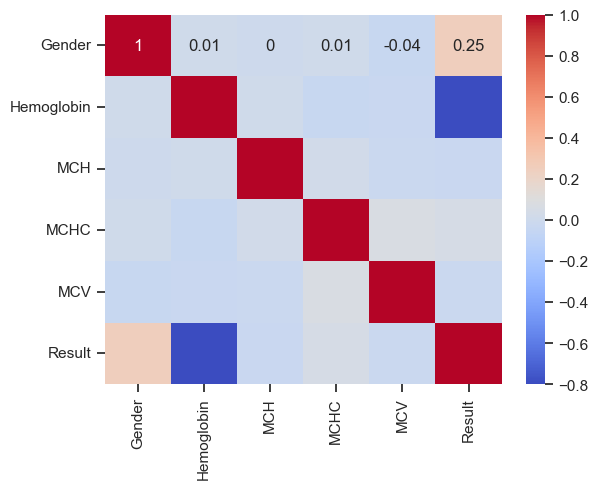

In [281]:

# create a correlation matrix
corr_matrix = df.corr().round(2)

# plot the correlation matrix using a heatmap from seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
#plt.title('Correlation Matrix', fontweight='bold')
plt.show()



The correlation coefficient between hemoglobin and result is -0.8, indicating a strong negative correlation. This means that as hemoglobin levels decrease, the likelihood of anemia increases.

## SelectKBest

To validate the outcome of the correlation matrix, statistical method known as univariate selection using the SelectKBest method was used to select the top 3 features. SelectKBest uses Chi-squared as scoring functions i.e., tests whether the occurrences of a specific feature and a specific class are independent using their frequency distribution. 

When we analyze the relationship between one feature and the target variable, we ignore the other features. That is why it is called ‘univariate
Each feature has its test score. Finally, all the test scores are compared, and the features with top scores will be selected.

In [282]:
import numpy as np
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

X = df.iloc[:,0:5]  # independent columns
y = df.iloc[:,5] 

k_values = [2, 3, 4, 5]  # different values of K to try
best_k = 0  # variable to keep track of best K value
best_score = 0  # variable to keep track of best score

for k in k_values:
    # apply SelectKBest class to extract top k best features
    bestfeatures = SelectKBest(score_func=chi2, k=k)
    fit = bestfeatures.fit(X, y)

    dfscores = pd.DataFrame(fit.scores_) # score for each feature
    dfcolumns = pd.DataFrame(X.columns)

    # concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Specs','Score']  # naming the dataframe columns

    # get the best K value based on score
    if featureScores['Score'].sum() > best_score:
        best_score = featureScores['Score'].sum()
        best_k = k

print(f"The best value of K is {best_k} with score {best_score}.")

print("---")
print(featureScores)
print("---")
print(featureScores.nlargest(3,'Score'))  #print 2 best features

The best value of K is 2 with score 307.0244798773891.
---
        Specs       Score
0      Gender   43.648385
1  Hemoglobin  261.707512
2         MCH    0.803292
3        MCHC    0.212839
4         MCV    0.652452
---
        Specs       Score
1  Hemoglobin  261.707512
0      Gender   43.648385
2         MCH    0.803292


# For Cross Validation for feature selection we use "Feature Importance"  
    You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 3 features for the dataset.


Notice that in an Extra Trees classifier, the features and splits are selected at random; hence, “Extremely Randomized Tree”. Since splits are chosen at random for each feature in the Extra Trees Classifier, it’s less computationally expensive than a Random Forest.

# Extremely Randomized Trees.

In [283]:
# Extremely Randomized Trees.
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [284]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.08208318 0.74915721 0.0577838  0.05391717 0.05705865]


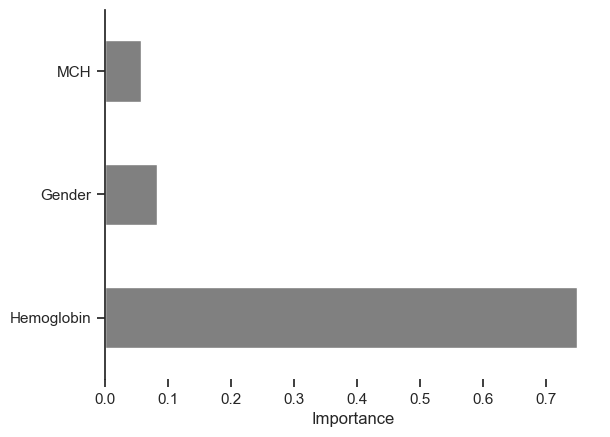

<Figure size 640x480 with 0 Axes>

In [285]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances.nlargest(3).plot(kind='barh', color='#808080')
plt.xlabel('Importance')
# plt.title('Top 3 Features Importance', fontweight='bold', fontsize=12)
# Remove spines
sns.despine(left=False, bottom=True)
plt.show()
plt.savefig('Top2Feature.jpg')

So from both Anova and Extra three Hemoglobin, Gender and MCV are important feature. So we will be using these feature for our model.

----

# Scaling  Features
To ensure that features with lesser significance do not dominate the objective function, you can use feature scaling techniques. One commonly used technique is standardization or normalization.

Standardization involves transforming the feature values so that they have a mean of zero and a standard deviation of one. This is achieved by subtracting the mean from each value and dividing by the standard deviation. This method ensures that all features have the same scale and do not dominate the objective function.

Normalization, on the other hand, involves scaling the feature values to a range between 0 and 1. This is achieved by subtracting the minimum value from each value and dividing by the range (maximum value - minimum value). This method is useful when the distribution of the feature values is not normal.


In [286]:
# Scale Hemoglobin by log
df['Hemoglobin_log'] = np.log(df.Hemoglobin + 0.01)

Here we take the logarithm of a variable as it has a skewed distribution or contains extreme values. 

By taking the logarithm, the range of the variable is compressed and extreme values are down-weighted, which can help to reduce the impact of outliers on the analysis.

Note that adding a small constant (0.01 in this case) is a common practice to avoid taking the logarithm of zero or negative values. The value chosen for the constant should be small enough to not significantly affect the distribution of the data, but large enough to avoid taking the logarithm of zero or negative values.

# Scale Hemoglobin by Standardization
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [287]:
# Scale Hemoglobin by Standardization
from sklearn.preprocessing import StandardScaler # importing a class from a module of a library

ss = StandardScaler() # object of the class StandardScaler ()
df['Hemoglobin_scaled'] = ss.fit_transform(df['Hemoglobin'].values.reshape(-1,1))

# Scale Hemoglobin by Normalization

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.



In [288]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler() # object of the class StandardScaler ()
df['Hemoglobin_minmax'] = mm.fit_transform(df['Hemoglobin'].values.reshape(-1,1))

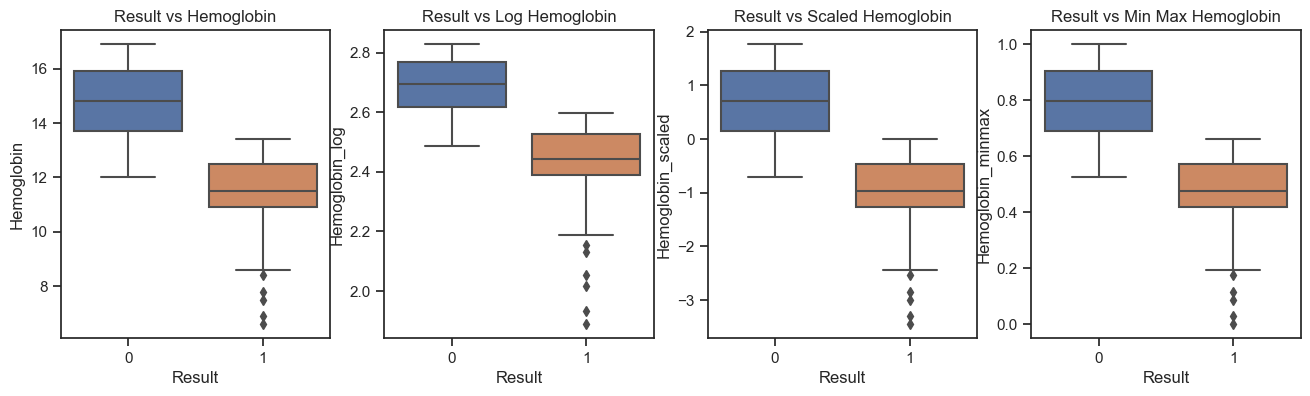

In [289]:
#Feature engineering to a better visualization of the values

# Let's explore the Aby Result and see the distribuition of Hemoglobin
fig , axs = plt.subplots(nrows = 1 , ncols = 4 , figsize = (16,4))

sns.boxplot(x ="Result",y="Hemoglobin",data=df, ax = axs[0])
axs[0].set_title("Result vs Hemoglobin")

sns.boxplot(x ="Result",y="Hemoglobin_log",data=df, ax = axs[1])
axs[1].set_title("Result vs Log Hemoglobin")

sns.boxplot(x ="Result",y="Hemoglobin_scaled",data=df, ax = axs[2])
axs[2].set_title("Result vs Scaled Hemoglobin")

sns.boxplot(x ="Result",y="Hemoglobin_minmax",data=df, ax = axs[3])
axs[3].set_title("Result vs Min Max Hemoglobin")

# fig.suptitle('Amount by Class', fontsize=20)
plt.show()

On scaling we see the distrubution are quite similar to the original one.  So we can say scaling is not as useful for this study.

Also, Tree-Based Algorithms, Decision Tree, Random Forest, Boosted Trees(GBM, light GBM, xgboost) may not benefit from scaling.

In [290]:
# calculate Q1, Q3, and IQR of the 'anemia' column
Q1 = df['Hemoglobin_log'].quantile(0.25)
Q3 = df['Hemoglobin_log'].quantile(0.75)
IQR = Q3 - Q1

# print the values of Q1, Q3, and IQR
print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)

Q1: 2.460443177609626
Q3: 2.7087166456453704
IQR: 0.24827346803574457


In [291]:
# calculate Q1, Q3, and IQR of the 'anemia' column
Q1 = df['Hemoglobin_scaled'].quantile(0.25)
Q3 = df['Hemoglobin_scaled'].quantile(0.75)
IQR = Q3 - Q1

# print the values of Q1, Q3, and IQR
print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)

Q1: -0.8677137764190042
Q3: 0.8041451321854968
IQR: 1.6718589086045008


In [292]:
# calculate Q1, Q3, and IQR of the 'anemia' column
Q1 = df['Hemoglobin_minmax'].quantile(0.25)
Q3 = df['Hemoglobin_minmax'].quantile(0.75)
IQR = Q3 - Q1

# print the values of Q1, Q3, and IQR
print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)

Q1: 0.4951456310679613
Q3: 0.8155339805825245
IQR: 0.3203883495145632


In [293]:
# calculate Q1, Q3, and IQR of the 'anemia' column
Q1 = df['Hemoglobin'].quantile(0.25)
Q3 = df['Hemoglobin'].quantile(0.75)
IQR = Q3 - Q1

# print the values of Q1, Q3, and IQR
print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)

Q1: 11.7
Q3: 15.0
IQR: 3.3000000000000007


* Here log scaling have compress the data as our distribution was left skew but log scaling assumes that the data is positively skewed, meaning the tail of the distribution extends more to the right than the left. 

* Standard and Normalized both scale have same nature so so we can say the data should not need any scaling

----

# Splitting data into Training and Testing samples

We don't use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as training data and the rest 30% is used as testing data.

In [294]:
df.columns

Index(['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV', 'Result',
       'Hemoglobin_log', 'Hemoglobin_scaled', 'Hemoglobin_minmax'],
      dtype='object')

In [295]:
# Separate Target Variable and Predictor Variables
# Here I am keeping the selected feature only 
X = df.drop(['MCHC','Hemoglobin_log', 'Hemoglobin_scaled', 'Hemoglobin_minmax', 'Result', 'MCH'],axis=1)
y = df['Result']

In [296]:
X

,Gender,Hemoglobin,MCV
0,1,14.9,83.7
1,0,15.9,72.0
2,0,9.0,71.2
3,0,14.9,87.5
4,1,14.7,99.5
...,...,...,...
1416,0,10.6,82.9
1417,1,12.1,86.9
1418,1,13.1,80.7
1419,0,14.3,95.2


In [297]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)

In [298]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (994, 3)
y_train -  (994,)
X_test -  (427, 3)
y_test -  (427,)


# Baseline for models
We will train four types of classifiers and decide which classifier will be more effective in detecting anemic condition.

We will use:
**Classification Models**

1. Logistic Regression
2. Decision Trees
3. Random Forest
4. Naive Bayes Classifier
5. SVM


# Model Building
We are aware that our dataset is highly imbalanced, however, we check the performance of imbalance dataset first and later we implement some techniques to balance the dataset and again check the performance of balanced dataset. Finally, we will compare each regression models performance.

# Logistic Regression

In [299]:
from sklearn.linear_model import LogisticRegression # Importing Classifier Step

In [300]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

LogisticRegression()

In [301]:
# Predict from Test set

y_pred = logreg.predict(X_test)

In [302]:
# Model Evolution
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       246
           1       0.99      1.00      0.99       181

    accuracy                           1.00       427
   macro avg       0.99      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427



In [303]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

Accuracy :0.99532
AUC : 0.99593
Precision : 0.98907
Recall : 1.00000
F1 : 0.99451




Recall (True Positive Rate): % of all Anemic cases captured.

Precision: Out of all items labeled as Anemic, what percentage of them is actually Anemic?

Accuracy: How correct the model is (misleading for Anemic/imbalanced data)

F1 score: combination of recall and precision into one metric. F1 score is the weighted average of precision and recall, taking BOTH false positives and false negatives into account. Usually much more useful than accuracy, especially with uneven classes.

In [304]:
# Predicted values counts for Anemic and Non Anemic of test dataset
pd.Series(y_pred).value_counts()

0    244
1    183
Name: count, dtype: int64

Our model predicted 183 cases as Anemic and 244 as non anemic from the test dataset.

In [305]:
# Actual values counts for Anemic and Non Anemic  of test dataset
pd.Series(y_test).value_counts()

Result
0    246
1    181
Name: count, dtype: int64

There are originally 181 Anemic cases and our model predicted only 183 fraud transaction. 

So the accuracy of our model should be 183/181, right?


In [306]:
183/181

1.011049723756906

However, this not the case. Actually there are originally 181 Anemic cases and 246 non Anemic cases in the test dataset.

However, our model predicted only 183 Anemic cases. Also, it should be kept in mind that these 183 predicted anemic cases may not be identified correctly. It means that these predicted 181 anemic transactions are NOT only from 183 originally anemic transaction, but they may also be from non anemic cases as well.

So we need to see its accuracy in differnt way.


# Model Evolution Matrix

In [307]:
# confusion matrix

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[244,   2],
       [  0, 181]], dtype=int64)

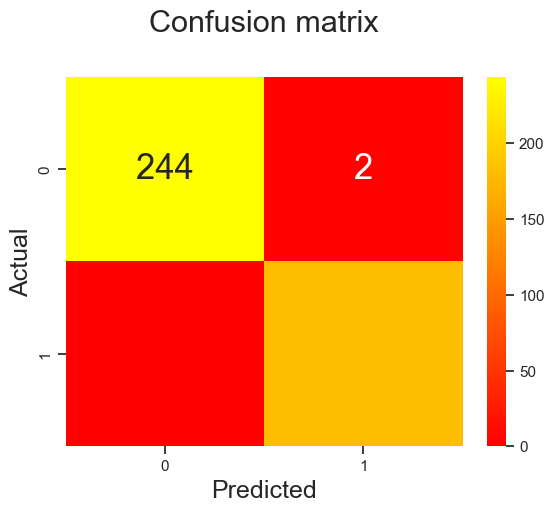

In [308]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="autumn" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

# ax.xaxis.set_ticklabels(['Genuine', 'Fraud']); 
# ax.yaxis.set_ticklabels(['Genuine', 'Fraud']);

plt.show()

There are 181 cases recognised as True Postive, means they are orignally anemic cases and our model precited them as anemic cases only.

True Negative - 244 (truely saying negative - non anemic cases correctly identified as non anemic)

True Postive - 181 (truely saying positive - anemic cases correctly identified as anemic)

False Negative - 0 ( falsely saying negative - anemic transaction incorrectly identified as non anemic)

False Positive - 0 ( falsely saying positive - non anemic transaction incorrectly identified as anemic)

We already know that we have 181 anemic cases in our test dataset, but our model predicted only 181 anemic casess. So the real accuracy of our model is 181/181

In [309]:
181/181

1.0

So, 100% is the real accuracy of our model, which is nothing but the Recall Score (here we have same accuracy and recall). So we have the emphasis on Recall score and F1 score to measure the performance of our model, not the accuracy.

# Receiver Operating Characteristics (ROC)

ROC (Receiver Operating Characteristic) curve is a graphical representation of the performance of a binary classification model, by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

ROC curves are typically evaluated on the test data or validation data, and not on the training data or during cross-validation. This is because the performance on the training data or during cross-validation may not be indicative of the true performance of the model on unseen data.

 higher the Area Under the Curve (AUC) score the better the model is at predicting Anemic/non-Anemic cases.
 
 Higher the area under the curve , better the model and it's ability to seperate the positive and negative class.
 
 
  <img src="rocgif.gif" >
 
 > However, AUC is not a good metric for imbalanced datasets
 
 
 ROC curves can sometimes be misleading in some very imbalanced applications. A ROC curve can still look pretty good (ie better than random) while misclassifying most or all of the minority class.

In contrast, PR curves are specifically tailored for the detection of rare events and are pretty useful in those scenarios. They will show that your classifier has a low performance if it is misclassifying most or all of the minority class. But they don't translate well to more balanced cases, or cases where negatives are rare.

In addition, because they are sensitive to the baseline probability of positive events, they don't generalize well and only apply to the specific dataset they were built on, or to datastets with the exact same balance. This means it is generally difficult to compare PR curves from different studies, limiting their usefulness.

As always, it is important to understand the tools that are available to you and select the right one for the right application. I suggest reading the question ROC vs precision-and-recall curves here on CV.

In [310]:
metrics.roc_auc_score(y_test , y_pred) 

0.9959349593495934

In [311]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[9.99794739e-01, 2.05261035e-04],
       [9.99999997e-01, 2.58194909e-09],
       [9.99567014e-01, 4.32986485e-04],
       [9.99999755e-01, 2.44749155e-07],
       [9.84250342e-01, 1.57496575e-02],
       [7.80834400e-05, 9.99921917e-01],
       [4.53607253e-02, 9.54639275e-01],
       [9.99999968e-01, 3.23168465e-08],
       [4.43675401e-02, 9.55632460e-01],
       [9.99292179e-01, 7.07821459e-04],
       [7.98620008e-04, 9.99201380e-01],
       [1.15037011e-06, 9.99998850e-01],
       [4.35795822e-01, 5.64204178e-01],
       [8.23943404e-01, 1.76056596e-01],
       [1.40233774e-02, 9.85976623e-01],
       [2.29128713e-02, 9.77087129e-01],
       [9.99999586e-01, 4.14370941e-07],
       [9.99999643e-01, 3.56731195e-07],
       [3.56410834e-04, 9.99643589e-01],
       [9.99480643e-01, 5.19356919e-04],
       [9.99983033e-01, 1.69665446e-05],
       [9.99999605e-01, 3.95439359e-07],
       [6.08308932e-02, 9.39169107e-01],
       [9.99999294e-01, 7.05791733e-07],
       [9.586409

AUC -  0.9959349593495934 



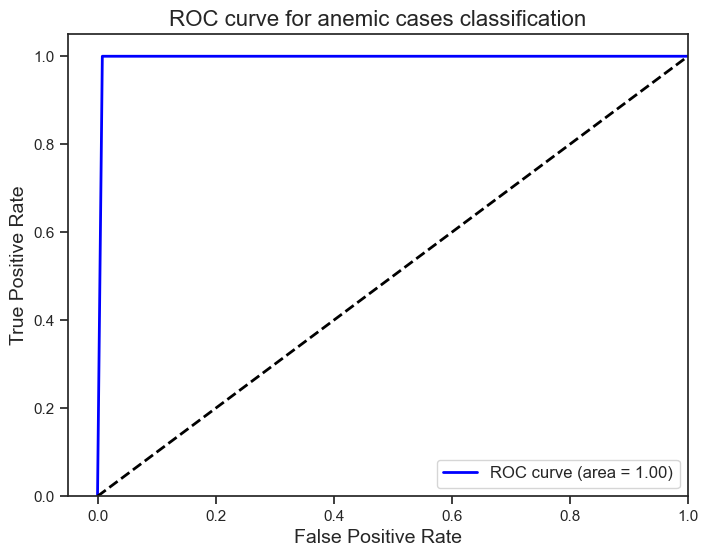

In [312]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC curve for anemic cases classification', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()


f1=0.995


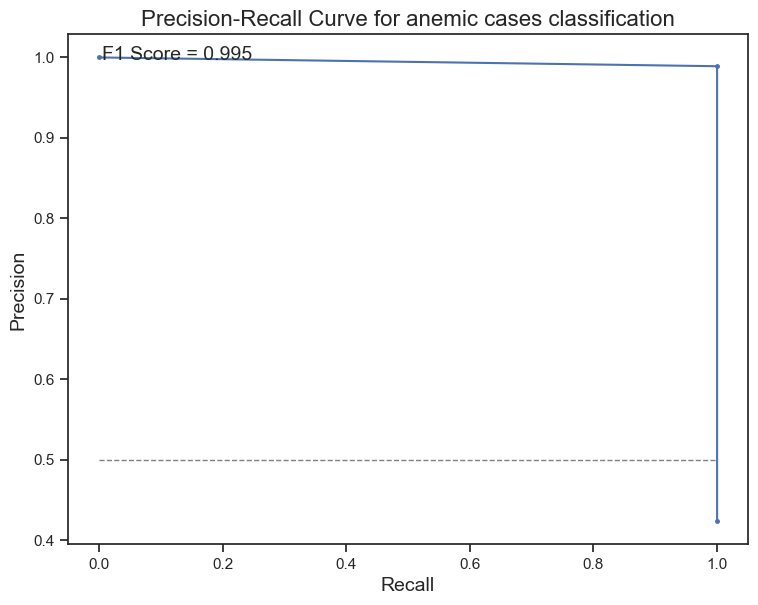

In [313]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)

print('f1=%.3f' % (f1))

# create figure and axis objects with custom size and padding
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95)

# plot no skill
ax.plot([0, 1], [0.5, 0.5], linestyle='--', color='gray', lw=1)

# plot the precision-recall curve
ax.plot(recall, precision, marker='.', markersize=5)

# set axis labels and title
ax.set_xlabel('Recall', fontsize=14)
ax.set_ylabel('Precision', fontsize=14)
ax.set_title('Precision-Recall Curve for anemic cases classification', fontsize=16)

# show F1 score in the plot
ax.text(0.05, 0.95, f'F1 Score = {f1:.3f}', transform=ax.transAxes, fontsize=14)

# show the plot
plt.show()


-----

# Class Imbalance

As found in EDA, the response variable Result have unequal data.



Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally. If one applies classifiers on the dataset, they are likely to predict everything as the majority class. This was often regarded as a problem in learning from highly imbalanced datasets.


To tackle the imbalance, we will be focuing on 

 <img src="classimbalance.png" >


## Random Oversampling 
Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models.

## Random undersampling
Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.

## Synthetic Minority OverSampling Technique (SMOTE)

In this technique, instead of simply duplicating data from the minority class, we synthesize new data from the minority class. This is a type of data augmentation for tabular data can be very effective. This approach to synthesizing new data is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short.


In [314]:
# Import imbalace technique algorithims

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# Logistic Regression with Random Undersampling technique 

In [315]:
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification



# Tackling Data Leakage

Data leakage occurs when information from outside the training data set is used to create a model, or when information from the test set is inadvertently included in the training process. 

> Simply, Identical samples in the both train and test. 

This can result in overestimation of the accuracy of the model, as the model is being trained on data that it will eventually see during testing.

To tackle daata leakage we will undersample or over sample ONLY train data.


In [316]:
print('Original dataset shape %s' % Counter(y_train))

# Undersampling only on train
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_rus))

Original dataset shape Counter({0: 555, 1: 439})
Resampled dataset shape Counter({0: 439, 1: 439})


In [317]:
# Undersampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_rus, y_train_rus)

y_pred_rus = logreg.predict(X_test)

In [318]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_rus , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_rus)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_rus)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_rus)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rus)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_rus)))

Accuracy :0.99297
AUC : 0.99390
Precision : 0.98370
Recall : 1.00000
F1 : 0.99178
Kappa Statistic : 0.98565


AUC -  0.9939024390243902 



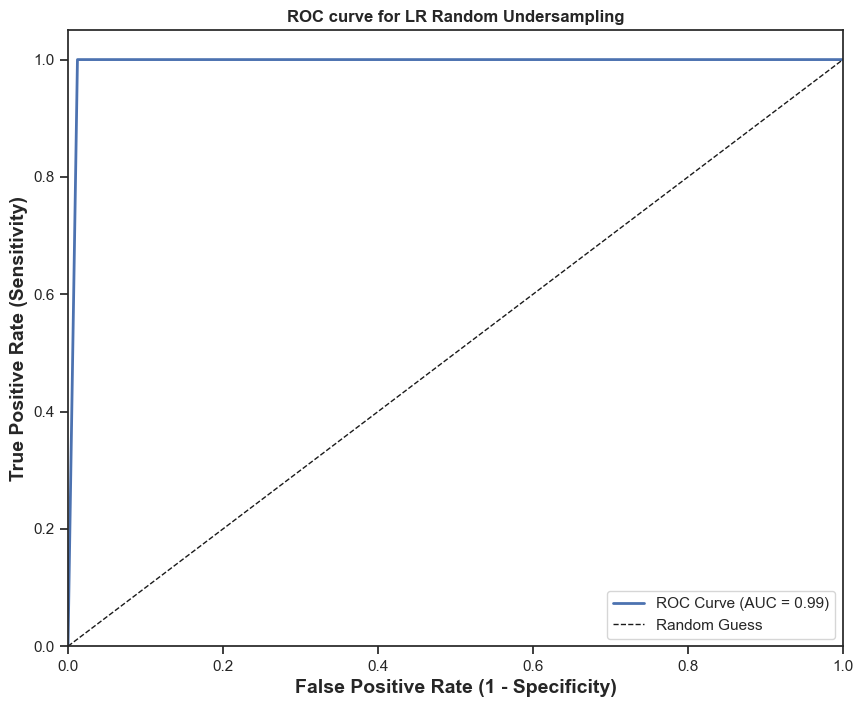

In [319]:
# plot ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rus)

auc = metrics.roc_auc_score(y_test, y_pred_rus)
print("AUC - ",auc,"\n")

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

# set the x-axis and y-axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# add labels and title
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14, fontweight='bold')
plt.title('ROC curve for LR Random Undersampling', fontsize=12, fontweight='bold')

# add legend
plt.legend(loc="lower right")

plt.show()


f1=0.992


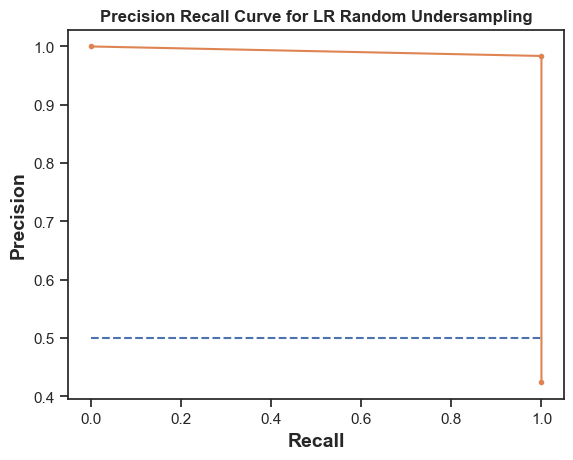

In [320]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_rus)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_rus)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# add labels and title
plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR Random Undersampling', fontsize=12, fontweight='bold')

# show the plot
plt.show()

Here our model have p-r = 1 and area under the curve for precision and recall is high too. 

The dotted blue line is "no skill" line which  represents the baseline for the precision-recall curve. It is the line where precision is equal to recall, which means that the model is randomly guessing the positive class. The dashed line in the plot shows this line as a reference for comparison with the precision-recall curve of the model. If the model's curve is above the dashed line, it indicates that the model is performing better than random guessing.

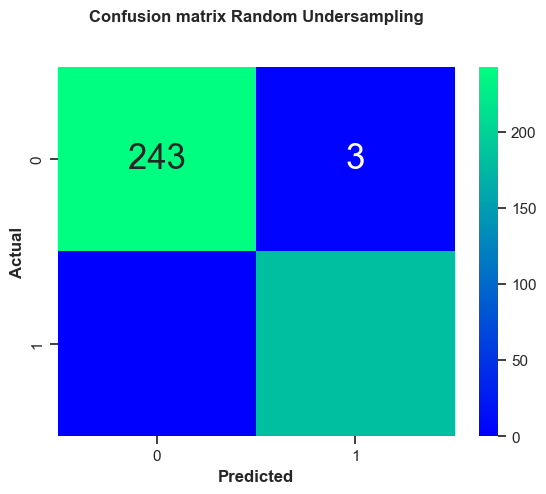

In [321]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_rus)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix Random Undersampling', y=1.1, fontsize = 12, fontweight='bold')
plt.xlabel('Predicted',fontsize = 12, fontweight='bold')
plt.ylabel('Actual',fontsize = 12, fontweight='bold')

# ax.xaxis.set_ticklabels(['non anemic', 'anemic']); 
# ax.yaxis.set_ticklabels(['non anemic', 'anemic']);

plt.show()

# Logistic Regression with Random Oversampling technique

In [322]:
from imblearn.over_sampling import RandomOverSampler

print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({0: 555, 1: 439})
Resampled dataset shape Counter({1: 555, 0: 555})


In [323]:
# Oversampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_ros, y_train_ros)

y_pred_ros = logreg.predict(X_test)

In [324]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_ros))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_ros)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_ros)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_ros)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_ros)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_ros)))


Accuracy :0.99297
AUC : 0.99390
Precision : 0.98370
Recall : 1.00000
F1 : 0.99178
Kappa Statistic : 0.98565


F1 score of 0.94 on the test set with data leakage and a score of 0.94 without data leakage.

Here, data leakage did not have a significant impact on the model's performance.

AUC -  0.9939024390243902 



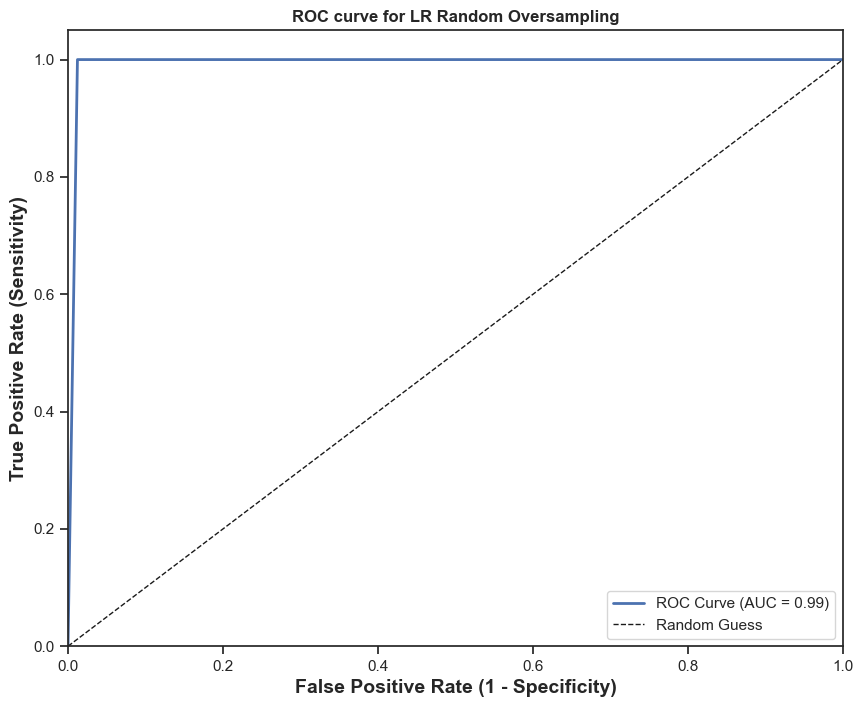

In [325]:
# plot ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ros)

auc = metrics.roc_auc_score(y_test, y_pred_ros)
print("AUC - ",auc,"\n")

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

# set the x-axis and y-axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# add labels and title
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14,fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14, fontweight='bold')
plt.title('ROC curve for LR Random Oversampling', fontsize=12, fontweight='bold')

# add legend
plt.legend(loc="lower right")

plt.show()


f1=0.992


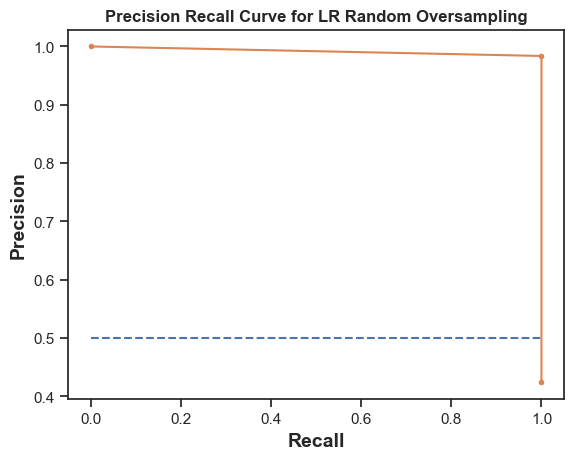

In [326]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_ros)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_ros)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')


# add labels and title
plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR Random Oversampling', fontsize=12, fontweight='bold')



# show the plot
plt.show()

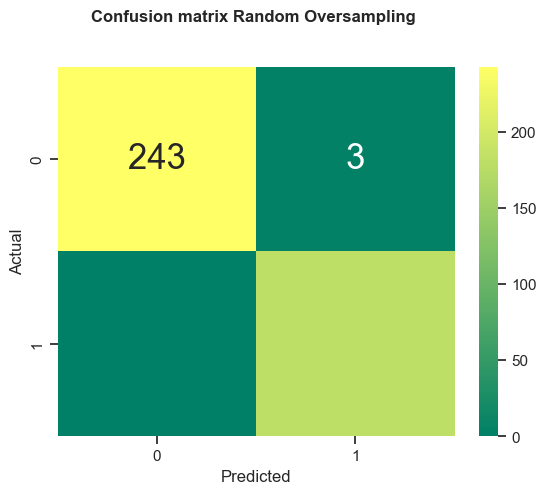

In [327]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred_ros)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="summer" ,fmt='g')

plt.title('Confusion matrix Random Oversampling ', y=1.1,  fontsize=12, fontweight='bold')
plt.xlabel('Predicted',fontsize = 12)
plt.ylabel('Actual',fontsize = 12)

# ax.xaxis.set_ticklabels(['non anemic', 'anemic']); 
# ax.yaxis.set_ticklabels(['non anemic', 'anemic']);

plt.show()

# Logistic Regression with SMOTE data

In [328]:
from imblearn.over_sampling import SMOTE


print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 555, 1: 439})
Resampled dataset shape Counter({1: 555, 0: 555})


In [329]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

y_pred_smote = logreg.predict(X_test)

In [330]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_smote))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_smote)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_smote)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_smote)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_smote)))
print('Kappa Statistic : {0:0.5f}'.format(cohen_kappa_score(y_test, y_pred_smote)))

Accuracy :0.99063
AUC : 0.99187
Precision : 0.97838
Recall : 1.00000
F1 : 0.98907
Kappa Statistic : 0.98088


F1 score of 0.99 on the test set with data leakage and a score of 0.98 without data leakage.

Here, data leakage did not have a significant impact on the model's performance.

AUC -  0.9918699186991871 



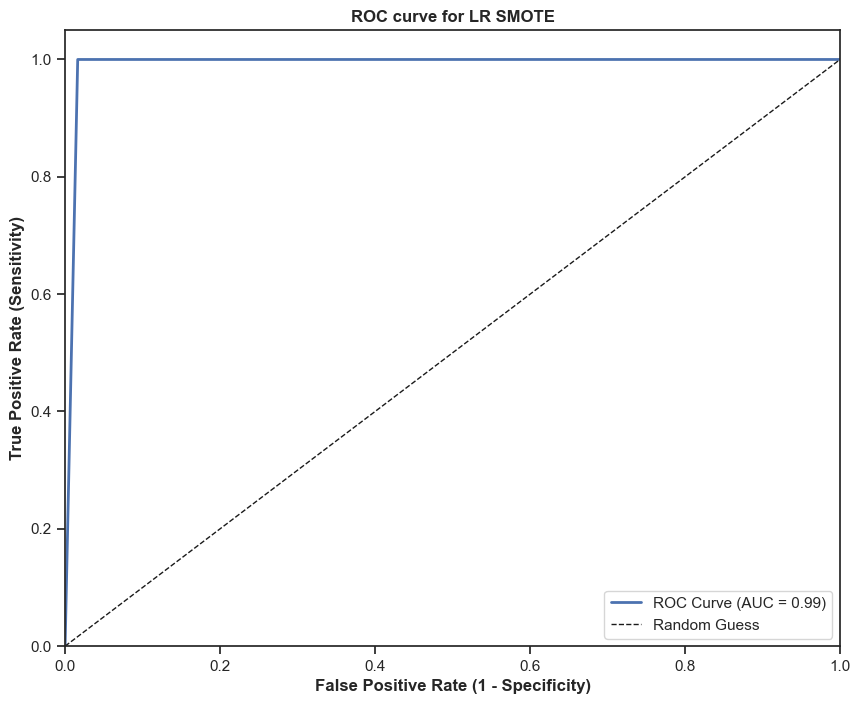

In [331]:
# plot ROC Curve
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_smote)

auc = metrics.roc_auc_score(y_test, y_pred_smote)
print("AUC - ",auc,"\n")

# plot the ROC curve
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label="Random Guess")

# set the x-axis and y-axis limits
plt.xlim([0, 1])
plt.ylim([0, 1.05])

# add labels and title
plt.xlabel('False Positive Rate (1 - Specificity)',  fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)',  fontsize=12, fontweight='bold')
plt.title('ROC curve for LR SMOTE',  fontsize=12, fontweight='bold')

# add legend
plt.legend(loc="lower right")

plt.show()


f1=0.989


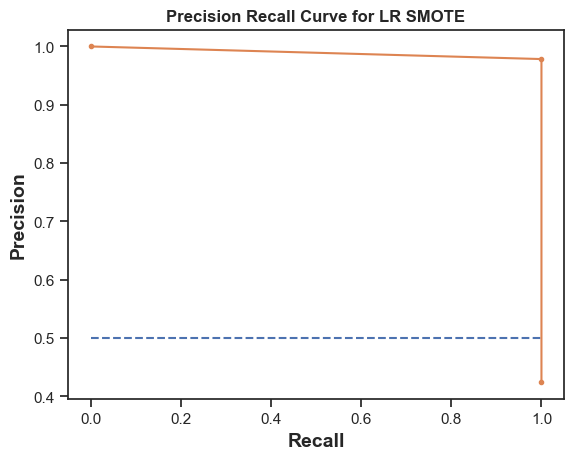

In [332]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_smote)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_smote)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# add labels and title
plt.xlabel('Recall', fontsize=14,fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
plt.title('Precision Recall Curve for LR SMOTE', fontsize=12, fontweight='bold')





# show the plot
plt.show()

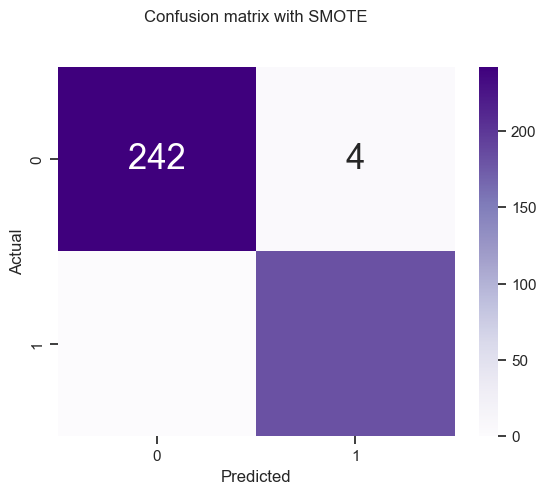

In [333]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="Purples" ,fmt='g')

plt.title('Confusion matrix with SMOTE', y=1.1, fontsize = 12)
plt.xlabel('Predicted',fontsize = 12)
plt.ylabel('Actual',fontsize = 12)



plt.show()

We have seen that imbalance dataset have Recall score of  100% and also with balanced dataset we have 100%.

It is possible to have a Recall score of 100% for both imbalanced and balanced datasets, but it would be very rare and dependent on the specific dataset and model used.

However, it is important to note that a Recall score of 100% does not necessarily mean that the model is perfect. It is possible for the model to have high Recall but low Precision, which means that it is correctly identifying most of the positive cases but also identifying many false positives. Therefore, it is important to consider both Recall and Precision together when evaluating the performance of a classification model.

# Distribution of balaced dataset


# Building different models with different balanced datasets

Let's now try different models , first by creating multiple datasets for undersampled , oversampled and SMOTE sampled

In [334]:
names_lst = []

# Empty list to capture performance matrix for train set
aucs_train_lst = []
accuracy_train_lst = []
precision_train_lst = []
recall_train_lst = []
f1_train_lst = []

# Empty list to capture performance matrix for test set
aucs_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []
kappa_lst = []

# Function for model building and performance measure

def build_measure_model(models):
    plt.figure(figsize=(12,6))

    for name, model, X_train, y_train, X_test, y_test in models:
        
        names_lst.append(name)

        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
        accuracy_train_lst.append(Accuracy_train)
        
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_lst.append(Accuracy_test)

        # calculate auc
        Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
        aucs_train_lst.append(Aucs_train)
        
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_test_lst.append(Aucs_test)

        # calculate precision
        PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
        precision_train_lst.append(PrecisionScore_train)
        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_lst.append(PrecisionScore_test)

        # calculate recall
        RecallScore_train = metrics.recall_score(y_train , y_train_pred)
        recall_train_lst.append(RecallScore_train)
        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_lst.append(RecallScore_test)

        # calculate f1 score
        F1Score_train = metrics.f1_score(y_train , y_train_pred)
        f1_train_lst.append(F1Score_train)
        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_lst.append(F1Score_test)

        #print('F1 Score of '+ name +' model : {0:0.5f}'.format(F1Score_test))
        
        
        # calculate kappa Statictis
        kappa = cohen_kappa_score(y_test, y_test_pred)
        kappa_lst.append(kappa)

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)
        
        
        
        

        print("Model Name :", name)
        
        print('Train Accuracy :{0:0.5f}'.format(Accuracy_train)) 
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        
        print('Train AUC : {0:0.5f}'.format(Aucs_train))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        
        print('Train Precision : {0:0.5f}'.format(PrecisionScore_train))
        print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        
        print('Train Recall : {0:0.5f}'.format(RecallScore_train))
        print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        
        print('Train F1 : {0:0.5f}'.format(F1Score_train))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        
        print('Kappa Statistic : {0:0.5f}'.format(kappa))
        
        print('Confusion Matrix : \n', cnf_matrix)
        
        print("\n")


        # plot ROC Curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    
        #---------- For loops ends here--------#


    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    #plt.title('ROC curve for Predicting a anemia cases')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

# Random Forest (RF)

Model Name : RF imbalance
Train Accuracy :1.00000
Test Accuracy :1.00000
Train AUC : 1.00000
Test AUC : 1.00000
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 1.00000
Kappa Statistic : 1.00000
Confusion Matrix : 
 [[246   0]
 [  0 181]]


Model Name : RF Undersampling
Train Accuracy :1.00000
Test Accuracy :1.00000
Train AUC : 1.00000
Test AUC : 1.00000
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 1.00000
Kappa Statistic : 1.00000
Confusion Matrix : 
 [[246   0]
 [  0 181]]


Model Name : RF Oversampling
Train Accuracy :1.00000
Test Accuracy :1.00000
Train AUC : 1.00000
Test AUC : 1.00000
Train Precision : 1.00000
Test Precision : 1.00000
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 1.00000
Kappa Statistic : 1.00000
Confusion Matrix : 
 [[246   0]
 [  0 181]]


Model Name : RF SMOTE
Train Accuracy :1.00

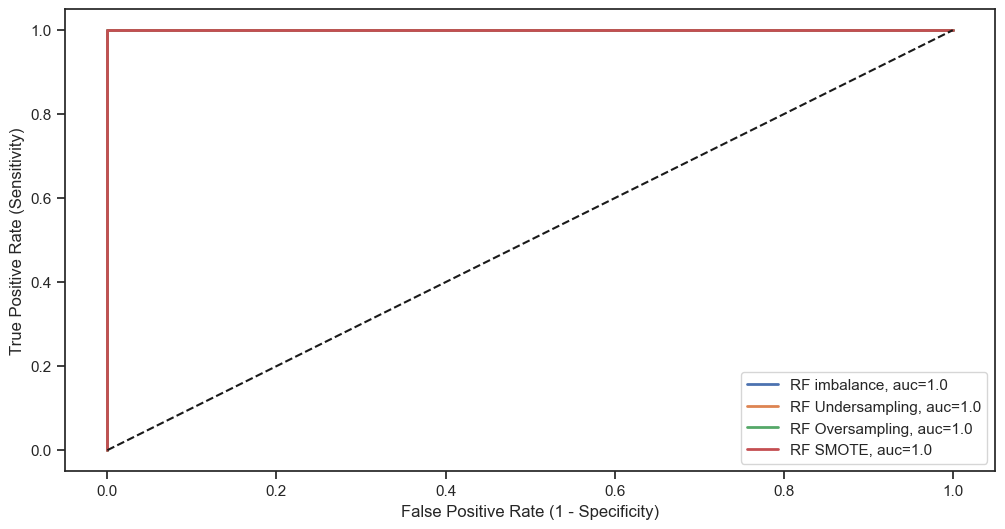

In [335]:
# Random Forest (RF) 
RFmodels = []

RFmodels.append(('RF imbalance', RandomForestClassifier(),X_train,y_train,X_test,y_test))
RFmodels.append(('RF Undersampling', RandomForestClassifier(),X_train_rus,y_train_rus,X_test,y_test))
RFmodels.append(('RF Oversampling', RandomForestClassifier(),X_train_ros,y_train_ros,X_test,y_test))
RFmodels.append(('RF SMOTE', RandomForestClassifier(),X_train_smote,y_train_smote,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

# K-Nearest Neighbors (KNN)

Model Name : KNN imbalance
Train Accuracy :0.99195
Test Accuracy :0.97892
Train AUC : 0.99232
Test AUC : 0.98025
Train Precision : 0.98646
Test Precision : 0.96237
Train Recall : 0.99544
Test Recall : 0.98895
Train F1 : 0.99093
Test F1 : 0.97548
Kappa Statistic : 0.95700
Confusion Matrix : 
 [[239   7]
 [  2 179]]


Model Name : KNN Undersampling
Train Accuracy :0.98519
Test Accuracy :0.96956
Train AUC : 0.98519
Test AUC : 0.97212
Train Precision : 0.97545
Test Precision : 0.94211
Train Recall : 0.99544
Test Recall : 0.98895
Train F1 : 0.98534
Test F1 : 0.96496
Kappa Statistic : 0.93807
Confusion Matrix : 
 [[235  11]
 [  2 179]]


Model Name : KNN Oversampling
Train Accuracy :0.98919
Test Accuracy :0.97424
Train AUC : 0.98919
Test AUC : 0.97618
Train Precision : 0.98224
Test Precision : 0.95213
Train Recall : 0.99640
Test Recall : 0.98895
Train F1 : 0.98927
Test F1 : 0.97019
Kappa Statistic : 0.94752
Confusion Matrix : 
 [[237   9]
 [  2 179]]


Model Name : KNN SMOTE
Train Accuracy :

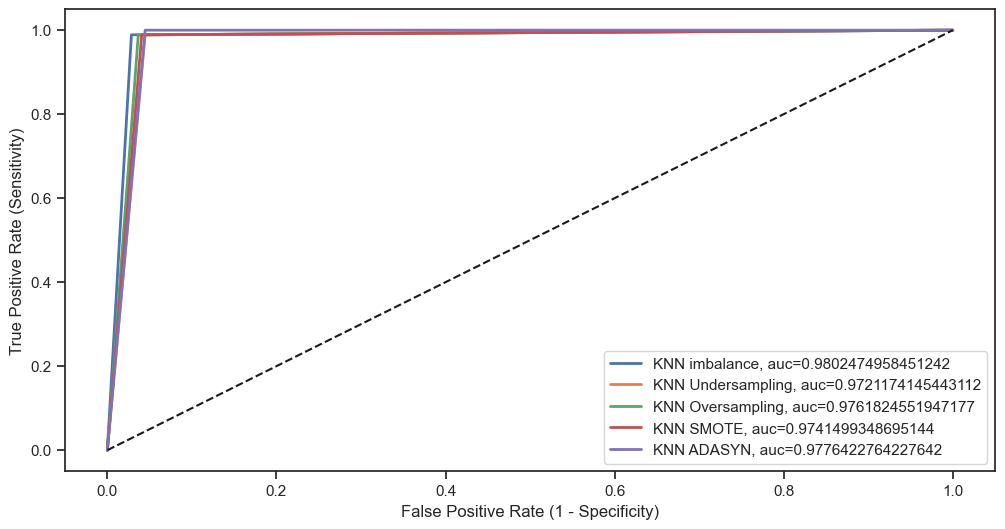

In [336]:
# K-Nearest Neighbors (KNN) 
KNNmodels = []

KNNmodels.append(('KNN imbalance', KNeighborsClassifier(),X_train,y_train,X_test,y_test))
KNNmodels.append(('KNN Undersampling', KNeighborsClassifier(),X_train_rus,y_train_rus,X_test,y_test))
KNNmodels.append(('KNN Oversampling', KNeighborsClassifier(),X_train_ros,y_train_ros,X_test,y_test))
KNNmodels.append(('KNN SMOTE', KNeighborsClassifier(),X_train_smote,y_train_smote,X_test,y_test))
KNNmodels.append(('KNN ADASYN', KNeighborsClassifier(),X_train_adasyn,y_train_adasyn,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(KNNmodels)

# Gaussian Naive Bayes (NB)

Model Name : NB imbalance
Train Accuracy :0.93159
Test Accuracy :0.96253
Train AUC : 0.93445
Test AUC : 0.96383
Train Precision : 0.89384
Test Precision : 0.94118
Train Recall : 0.95900
Test Recall : 0.97238
Train F1 : 0.92527
Test F1 : 0.95652
Kappa Statistic : 0.92362
Confusion Matrix : 
 [[235  11]
 [  5 176]]


Model Name : NB Undersampling
Train Accuracy :0.93622
Test Accuracy :0.95316
Train AUC : 0.93622
Test AUC : 0.95643
Train Precision : 0.90658
Test Precision : 0.91710
Train Recall : 0.97267
Test Recall : 0.97790
Train F1 : 0.93846
Test F1 : 0.94652
Kappa Statistic : 0.90493
Confusion Matrix : 
 [[230  16]
 [  4 177]]


Model Name : NB Oversampling
Train Accuracy :0.93964
Test Accuracy :0.95316
Train AUC : 0.93964
Test AUC : 0.95643
Train Precision : 0.90803
Test Precision : 0.91710
Train Recall : 0.97838
Test Recall : 0.97790
Train F1 : 0.94189
Test F1 : 0.94652
Kappa Statistic : 0.90493
Confusion Matrix : 
 [[230  16]
 [  4 177]]


Model Name : NB SMOTE
Train Accuracy :0.94

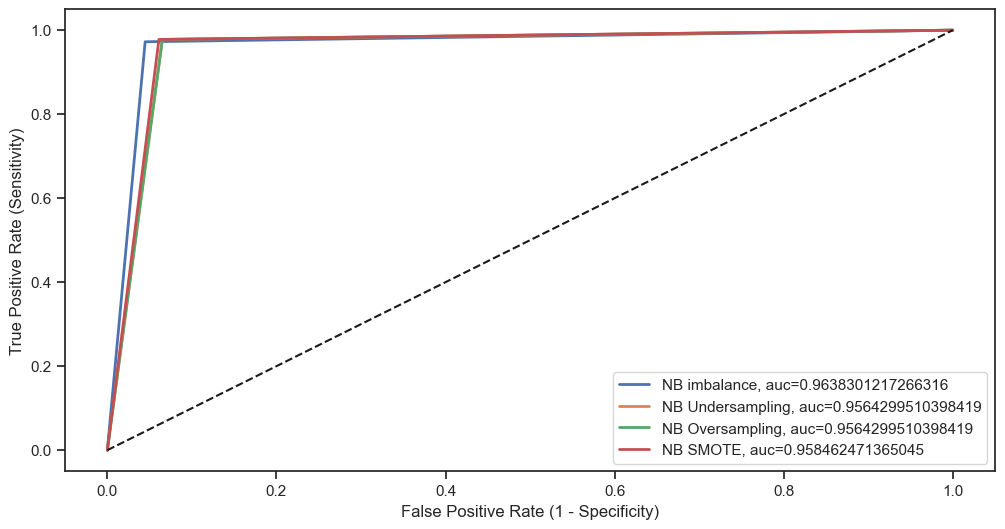

In [337]:
# Gaussian Naive Bayes (NB) 
NBmodels = []

NBmodels.append(('NB imbalance', GaussianNB(),X_train,y_train,X_test,y_test))
NBmodels.append(('NB Undersampling', GaussianNB(),X_train_rus,y_train_rus,X_test,y_test))
NBmodels.append(('NB Oversampling', GaussianNB(),X_train_ros,y_train_ros,X_test,y_test))
NBmodels.append(('NB SMOTE', GaussianNB(),X_train_smote,y_train_smote,X_test,y_test))

# Call function to create model and measure its performance
build_measure_model(NBmodels)

# Performance measures of various classifiers

In [338]:
data = {'Model':names_lst,
       #'Accuracy_Train':accuracy_train_lst,
       'Accuracy_Test':accuracy_test_lst,
       #'AUC_Train':aucs_train_lst,
       'AUC_Test':aucs_test_lst,
       #'PrecisionScore_Train':precision_train_lst,
       'PrecisionScore_Test':precision_test_lst,
       #'RecallScore_Train':recall_train_lst,
       'RecallScore_Test':recall_test_lst,
       #'F1Score_Train':f1_train_lst,
       'F1Score_Test':f1_test_lst,
       'Kappa Stat' : kappa_lst
       }



print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(data)
performance_df = performance_df.round(3)
finaltable = performance_df.sort_values(['F1Score_Test','RecallScore_Test','AUC_Test'],ascending=False)
finaltable

Performance measures of various classifiers: 



,Model,Accuracy_Test,AUC_Test,PrecisionScore_Test,RecallScore_Test,F1Score_Test,Kappa Stat
0,RF imbalance,1.000,1.000,1.000,1.000,1.000,1.000
1,RF Undersampling,1.000,1.000,1.000,1.000,1.000,1.000
2,RF Oversampling,1.000,1.000,1.000,1.000,1.000,1.000
3,RF SMOTE,1.000,1.000,1.000,1.000,1.000,1.000
4,KNN imbalance,0.979,0.980,0.962,0.989,0.975,0.957
8,KNN ADASYN,0.974,0.978,0.943,1.000,0.971,0.948
6,KNN Oversampling,0.974,0.976,0.952,0.989,0.970,0.948
7,KNN SMOTE,0.972,0.974,0.947,0.989,0.968,0.943
5,KNN Undersampling,0.970,0.972,0.942,0.989,0.965,0.938
9,NB imbalance,0.963,0.964,0.941,0.972,0.957,0.924


In [339]:
# Export the DataFrame to an Excel file
finaltable.to_excel('my_table.xlsx', index=False)


After training each of the models, above result were obtained.  



Looking at the ROC graphs we see Decision Tree and Random forest in any balancing technique have both good capture  True Positives and also False Positives.

This means we capture more anemic cases So Random Forest and Decision Tree with any balnacing technique is our final model, as this gives highest F1 score of 100% on test datasets.


------

## Hyperparameter tuning

Hyperparameter tuning is an important step in the machine learning pipeline as it helps to find the optimal set of hyperparameters that can maximize the performance of the model. There are several ways to perform hyperparameter tuning, but the study incorporate GridsearchCV

### GridSearchCV

It takes in a model, a grid of hyperparameters, and a scoring metric, and performs a cross-validated search over the hyperparameter grid to find the best combination. The result is the best combination of hyperparameters that produces the highest score on the chose. To note that GridsearchCV can be computationally expensive, especially with large hyperparameter spaces.

In [340]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# define the classifiers to be evaluated
classifiers_ = [ 
               RandomForestClassifier(),  
               GaussianNB(), 
               KNeighborsClassifier()]

# define the parameter grids for each classifier
param_grids = [ 
               {'n_estimators': [50, 100, 200], 'max_depth': range(1, 10)}, # random forest
                   {}, # naive bayes - no hyperparameters to tune
# Naive Bayes is a probabilistic classifier that is based on Bayes' theorem and the "naive" assumption that
# the presence or absence of a  particular feature is independent of the presence or absence of any other feature.
# Naive Bayes makes no assumptions about the distribution of the data, unlike other classifiers like decision trees, 
# SVM, or logistic regression               
               {"n_neighbors": list(range(2,60,1)),'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}] # KNN regression


# perform GridSearchCV for each classifier
for clf, param_grid in zip(classifiers_, param_grids):
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    print(clf.__class__.__name__, "best params:", grid_search.best_params_, "best score:", grid_search.best_score_)
    print("F1 score:", f1_score(y_test, y_pred))


RandomForestClassifier best params: {'max_depth': 3, 'n_estimators': 50} best score: 0.9979899497487438
F1 score: 1.0
GaussianNB best params: {} best score: 0.9306075833714026
F1 score: 0.9565217391304347
KNeighborsClassifier best params: {'algorithm': 'auto', 'n_neighbors': 2} best score: 0.9828993452109029
F1 score: 0.9859943977591036


Using GridSearch we see that for decison tree it is suitable to use gini criterion and max depth to be 3. 

----

# Cross validation



In [341]:
# perform 5-fold cross-validation for each classifier
for clf in classifiers_:
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print(clf.__class__.__name__, "mean accuracy:", scores.mean(), "std deviation:", scores.std())


RandomForestClassifier mean accuracy: 1.0 std deviation: 0.0
GaussianNB mean accuracy: 0.9352433901655548 std deviation: 0.01834329937188562
KNeighborsClassifier mean accuracy: 0.9753718804052385 std deviation: 0.007376653835814381


the DecisionTreeClassifier and RandomForestClassifier algorithms have the highest ranking based on their mean accuracy, with both having a mean accuracy of 1.0 and standard deviation of 0.0. The LogisticRegression and KNeighborsClassifier algorithms also have high mean accuracy, with standard deviations less than 0.02. The GaussianNB and SVC algorithms have lower mean accuracy, with the SVC algorithm having the lowest mean accuracy of all.

# Plotting Accuracy 

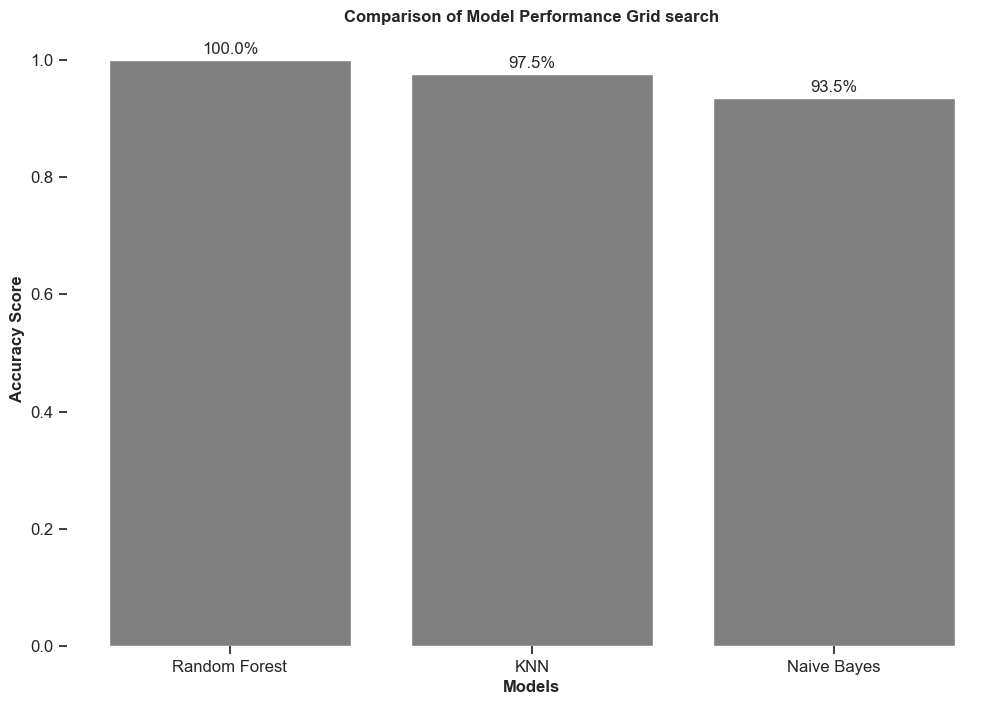

In [342]:
import matplotlib.pyplot as plt

# Define the labels, scores and colors for each model
labels = ['Random Forest','Naive Bayes','KNN','Logistic Regression']
scores = [1.00,0.935,0.975,0.935]
colors = ['#808080']

# Sort the scores and labels in descending order
sorted_scores, sorted_labels = zip(*sorted(zip(scores, labels), reverse=True))

# Set up the plot
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(sorted_labels, sorted_scores, color=colors)

# Set the title and axis labels
ax.set_title('Comparison of Model Performance Grid search', fontsize=12, fontweight='bold')
ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy Score', fontsize=12, fontweight='bold')

# Set the tick font size
ax.tick_params(axis='both', which='major', labelsize=12)

# Add the accuracy score as text above each bar
for i, score in enumerate(sorted_scores):
    ax.text(i, score+0.01,  f'{score*100:.1f}%', fontsize=12, ha='center')

    

# Remove spines
sns.despine(left=True, bottom=True)


# Display the plot
plt.show()


# Findings


* F1: Scaling of data with or without have no effect on the model performance. 
* F2: Based on hyperparameter tuning with GridSearchCV 

     * Decision Tree is best with criterion': 'gini', 'max_depth': 3
     * RandomForestClassifier is best with 'max_depth': 3, 'n_estimators': 50
     * SVC with  'C': 10, 'kernel': 'linear'
     * LogisticRegression  with 'C': 10, 'solver': 'newton-cg'
     * KNN with 'algorithm': 'auto', 'n_neighbors': 2


* F3: Comparing between tackling class imbalance

    * DT and RF performed well with and even withour handling class imbalance
    * SVM with ADASYN outperformed all class imbalance methods, with AUC 0.984 and accuracy 98% and         Kappa stat 0.962, F1 score of 0.978
    * KNN  without balancing performed well compared with all class imbalance methods imbalance	accuracy 97%, AUC 0.980, Kappa stat	0.957	F1 score 0.975
    * Naive Bayes  without balancing performed well compared with all class imbalance methods, with accuracy 96% and        AUC 0.964, Kappa stat 0.924 and F1 score  0.957
    * LR with ADASYN outperformed all class imbalance methods, with accuracy 94%, AUC 0.947, Kappa Stat 0.886 and F1 score 0.936
    
* F4: For Anemia classification the important feature is to look for Hemoglobin, Gender and MCV.

* F5: Gender has no impact on hemoglobin levels with t-statistic is -0.41 and the p-value is 0.679. 

* F6: Female is associated with a higher risk of anemia compared to male, assuming that other factors in the model are held constant with Odds Ratio for gender: 2.86.
    
    

> Looking at the ROC graphs we see Decision Tree and Random forest in any balancing technique have both good capture  True Positives and also False Positives. This means we capture more anemic cases So Random Forest and Decision Tree with any balnacing technique is our final model, as this gives highest F1 score of 100% on test datasets.


----------